# Machine Learning Project: Predicting Last Traded Price (LTP)

**Name:** Francis Jose  
**Organization:** Entri Elevate  
**Date:** August 16, 2024

---

## Overview of Problem Statement

In this project, I aim to predict the Last Traded Price (LTP) of a stock using historical data and various machine learning models. Accurate prediction of LTP can be beneficial for traders and investors to make informed decisions.

---

## Objective

The objective of this project is to build a predictive model that can accurately forecast the Last Traded Price (LTP) of a stock based on historical data and other relevant features. By using different machine learning algorithms and techniques, we aim to find the best model for this task.

---

## Data Description

### Source
The dataset used in this project is from Kaggle: [ITC-NSE 24 Year Stock Data](https://www.kaggle.com/datasets/sanyamgoyal401/itc-nse-24-year-stock-datale)

### Features
The dataset contains the following features:
- **Date**: The date of the stock data
- **Series**: The type of stock series (e.g., EQ for equity)
- **Open**: Opening price of the stock on the given date
- **High**: Highest price of the stock on the given date
- **Low**: Lowest price of the stock on the given date
- **Prev. Close**: Previous closing price of the stock
- **LTP**: Last traded price of the stock
- **Close**: Closing price of the stock on the given date
- **VWAP**: Volume-weighted average price
- **52W H**: 52-week high price
- **52W L**: 52-week low price
- **Volume**: Number of shares traded
- **Value**: Total value of shares traded
- **No of Trades**: Number of trades executed

In [1]:
import pandas as pd

# Verify the file path
file_path = r'C:\Users\Franzy\Documents\FranZy\Enri Data Science\Capstone Project\ITC-EQ-01-04-2000-to-31-03-2024.csv'

try:
    # Attempt to load the dataset
    data = pd.read_csv(file_path, encoding='utf-8')
    print("Dataset loaded successfully.")
    
    # Display the first few rows of the dataset
    print(data.head())
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pd.errors.ParserError:
    print("Error parsing the file. Check the file format.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset loaded successfully.
         date series   open   high     low  prev._close     ltp   close  \
0  2000-04-03     EQ  739.9  800.8  721.05       741.45  792.75  797.00   
1  2000-04-04     EQ  785.0  785.0  733.25       797.00  733.25  733.25   
2  2000-04-05     EQ  680.0  740.0  675.05       733.25  696.10  698.75   
3  2000-04-06     EQ  705.0  711.0  646.10       698.75  685.00  682.80   
4  2000-04-07     EQ  682.0  733.9  682.00       682.80  730.00  730.95   

     vwap   52w_h  52w_l   volume         value  no_of_trades  
0  772.76  1140.8  580.0  1720025  1.329165e+09           NaN  
1  744.37  1140.8  580.0   581309  4.327067e+08           NaN  
2  700.53  1140.8  580.0   706269  4.947637e+08           NaN  
3  676.06  1140.8  580.0   431386  2.916423e+08           NaN  
4  722.23  1140.8  580.0  1087357  7.853181e+08           NaN  


In [2]:
# Convert 'value' column to float and display in standard numeric format
pd.options.display.float_format = '{:.2f}'.format

# Display the first few rows to verify the change
print(data.head())

         date series   open   high    low  prev._close    ltp  close   vwap  \
0  2000-04-03     EQ 739.90 800.80 721.05       741.45 792.75 797.00 772.76   
1  2000-04-04     EQ 785.00 785.00 733.25       797.00 733.25 733.25 744.37   
2  2000-04-05     EQ 680.00 740.00 675.05       733.25 696.10 698.75 700.53   
3  2000-04-06     EQ 705.00 711.00 646.10       698.75 685.00 682.80 676.06   
4  2000-04-07     EQ 682.00 733.90 682.00       682.80 730.00 730.95 722.23   

    52w_h  52w_l   volume         value  no_of_trades  
0 1140.80 580.00  1720025 1329164700.35           NaN  
1 1140.80 580.00   581309  432706684.55           NaN  
2 1140.80 580.00   706269  494763659.20           NaN  
3 1140.80 580.00   431386  291642272.40           NaN  
4 1140.80 580.00  1087357  785318069.15           NaN  


## Data Preprocessing and Initial Exploratory Data Analysis

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          5981 non-null   object 
 1   series        5981 non-null   object 
 2   open          5981 non-null   float64
 3   high          5981 non-null   float64
 4   low           5981 non-null   float64
 5   prev._close   5981 non-null   float64
 6   ltp           5981 non-null   float64
 7   close         5981 non-null   float64
 8   vwap          5981 non-null   float64
 9   52w_h         5965 non-null   float64
 10  52w_l         5965 non-null   float64
 11  volume        5981 non-null   int64  
 12  value         5981 non-null   float64
 13  no_of_trades  3193 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 654.3+ KB
None


In [4]:
# Data Cleaning: Handling Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 date               0
series             0
open               0
high               0
low                0
prev._close        0
ltp                0
close              0
vwap               0
52w_h             16
52w_l             16
volume             0
value              0
no_of_trades    2788
dtype: int64


In [5]:
# Check the number of rows and columns
rows, columns = data.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 5981 rows and 14 columns.


In [6]:
# Display basic statistics for the 'no_of_trades' column
print(data['no_of_trades'].describe())

count     3193.00
mean    108612.63
std      68787.57
min       1425.00
25%      63041.00
50%      93699.00
75%     132996.00
max     734612.00
Name: no_of_trades, dtype: float64


### Visualize the Distribution:
A histogram or box plot can help visually assess the skewness of the distribution of 'no_of_trades'.



Skewness of 'no_of_trades' column: 2.5046102067285214


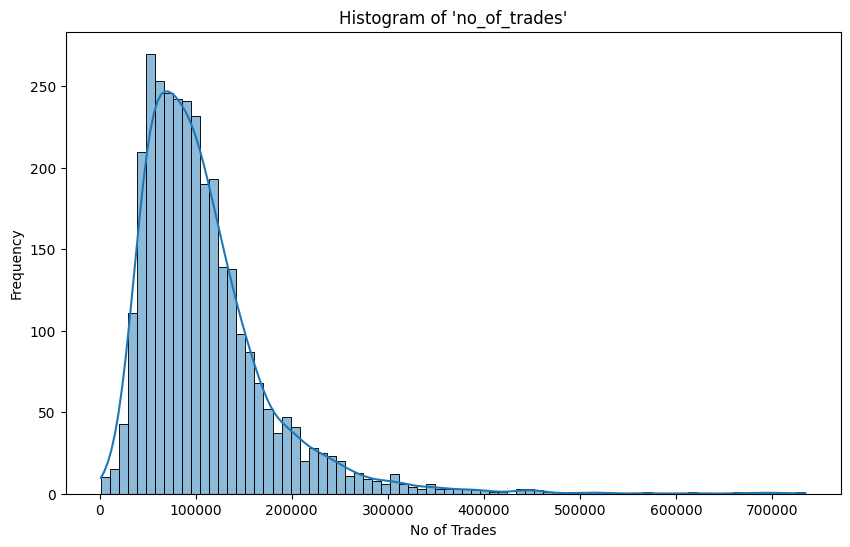

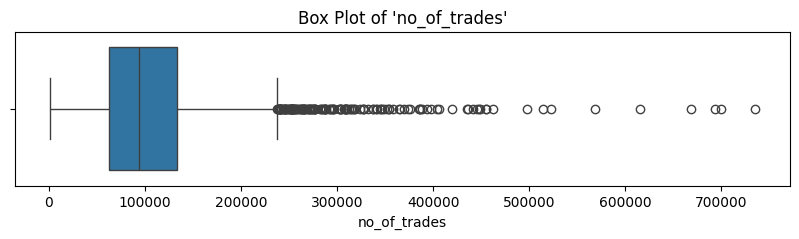

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Calculate skewness
skewness = data['no_of_trades'].skew()
print(f"Skewness of 'no_of_trades' column: {skewness}")

# Visualize the distribution with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['no_of_trades'], kde=True)
plt.title("Histogram of 'no_of_trades'")
plt.xlabel('No of Trades')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution with a box plot
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['no_of_trades'])
plt.title("Box Plot of 'no_of_trades'")
plt.show()


In [8]:
# Display missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with the median for the 'no_of_trades' column
data['52w_h'] = data['52w_h'].fillna(data['52w_h'].mean())
data['52w_l'] = data['52w_l'].fillna(data['52w_l'].mean())
data['no_of_trades'] = data['no_of_trades'].fillna(data['no_of_trades'].median())

# Verify that there are no missing values left
missing_values = data.isnull().sum()
print("Missing values after imputation:\n", missing_values)

Missing values in each column:
 date               0
series             0
open               0
high               0
low                0
prev._close        0
ltp                0
close              0
vwap               0
52w_h             16
52w_l             16
volume             0
value              0
no_of_trades    2788
dtype: int64
Missing values after imputation:
 date            0
series          0
open            0
high            0
low             0
prev._close     0
ltp             0
close           0
vwap            0
52w_h           0
52w_l           0
volume          0
value           0
no_of_trades    0
dtype: int64


In [9]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          5981 non-null   object 
 1   series        5981 non-null   object 
 2   open          5981 non-null   float64
 3   high          5981 non-null   float64
 4   low           5981 non-null   float64
 5   prev._close   5981 non-null   float64
 6   ltp           5981 non-null   float64
 7   close         5981 non-null   float64
 8   vwap          5981 non-null   float64
 9   52w_h         5981 non-null   float64
 10  52w_l         5981 non-null   float64
 11  volume        5981 non-null   int64  
 12  value         5981 non-null   float64
 13  no_of_trades  5981 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 654.3+ KB
None


In [10]:
# Display basic statistics of the dataset
print(data.describe())

         open    high     low  prev._close     ltp   close    vwap   52w_h  \
count 5981.00 5981.00 5981.00      5981.00 5981.00 5981.00 5981.00 5981.00   
mean   405.04  410.47  399.33       404.87  404.78  404.81  404.97  554.71   
std    309.51  314.17  305.16       309.62  309.53  309.59  309.76  450.25   
min    115.00  116.20  114.40       115.45  115.50  115.45  115.39  194.80   
25%    206.40  208.40  203.85       206.05  206.20  206.25  205.97  271.00   
50%    281.85  284.00  278.50       281.55  281.50  281.55  281.33  367.70   
75%    443.40  446.85  439.70       442.90  443.10  442.90  443.04  782.65   
max   1946.00 1964.80 1916.30      1940.10 1940.00 1940.10 1933.79 1964.80   

        52w_l       volume          value  no_of_trades  
count 5981.00      5981.00        5981.00       5981.00  
mean   295.90   8436509.79  2218858006.29     101660.75  
std    192.02  10639339.02  2644908318.13      50804.11  
min    114.40      6797.00     5340131.75       1425.00  
25%    

In [11]:
# Drop the 'series' column from the original dataset if it exists
if 'series' in data.columns:
    data.drop(columns=['series'], inplace=True)
    print("'series' column has been dropped.")
else:
    print("'series' column is not in the dataset, no need to drop it.")

# Verify the columns after dropping
print("Columns in original_data after dropping 'series':", data.columns.tolist())

'series' column has been dropped.
Columns in original_data after dropping 'series': ['date', 'open', 'high', 'low', 'prev._close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades']


## Visualizations

### Initial Understandings

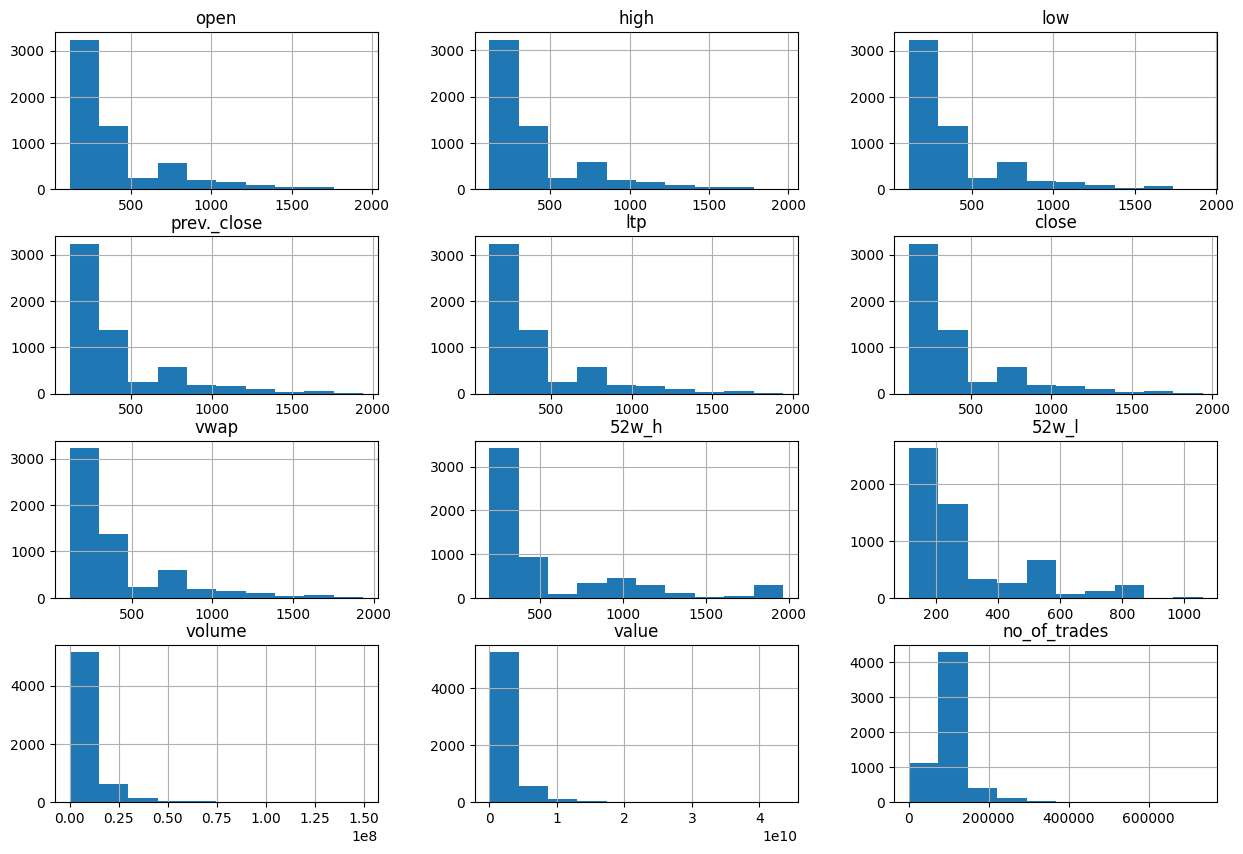

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram
data.hist(figsize=(15, 10))
plt.show()

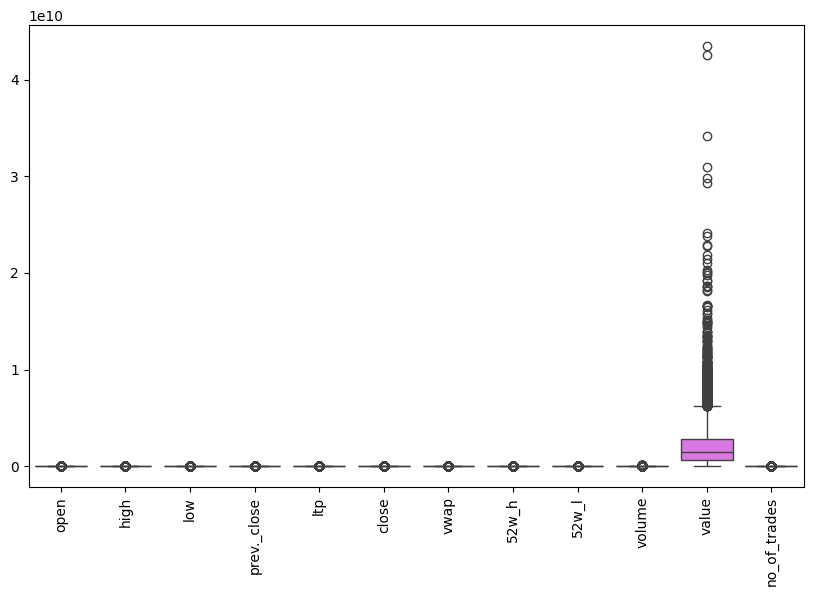

In [13]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

### A pair plot (short for pairwise plot) is a visualization tool in data analysis that shows the pairwise relationships between variables in a dataset. It’s particularly useful for understanding the distribution of data and the relationships between multiple variables at once.

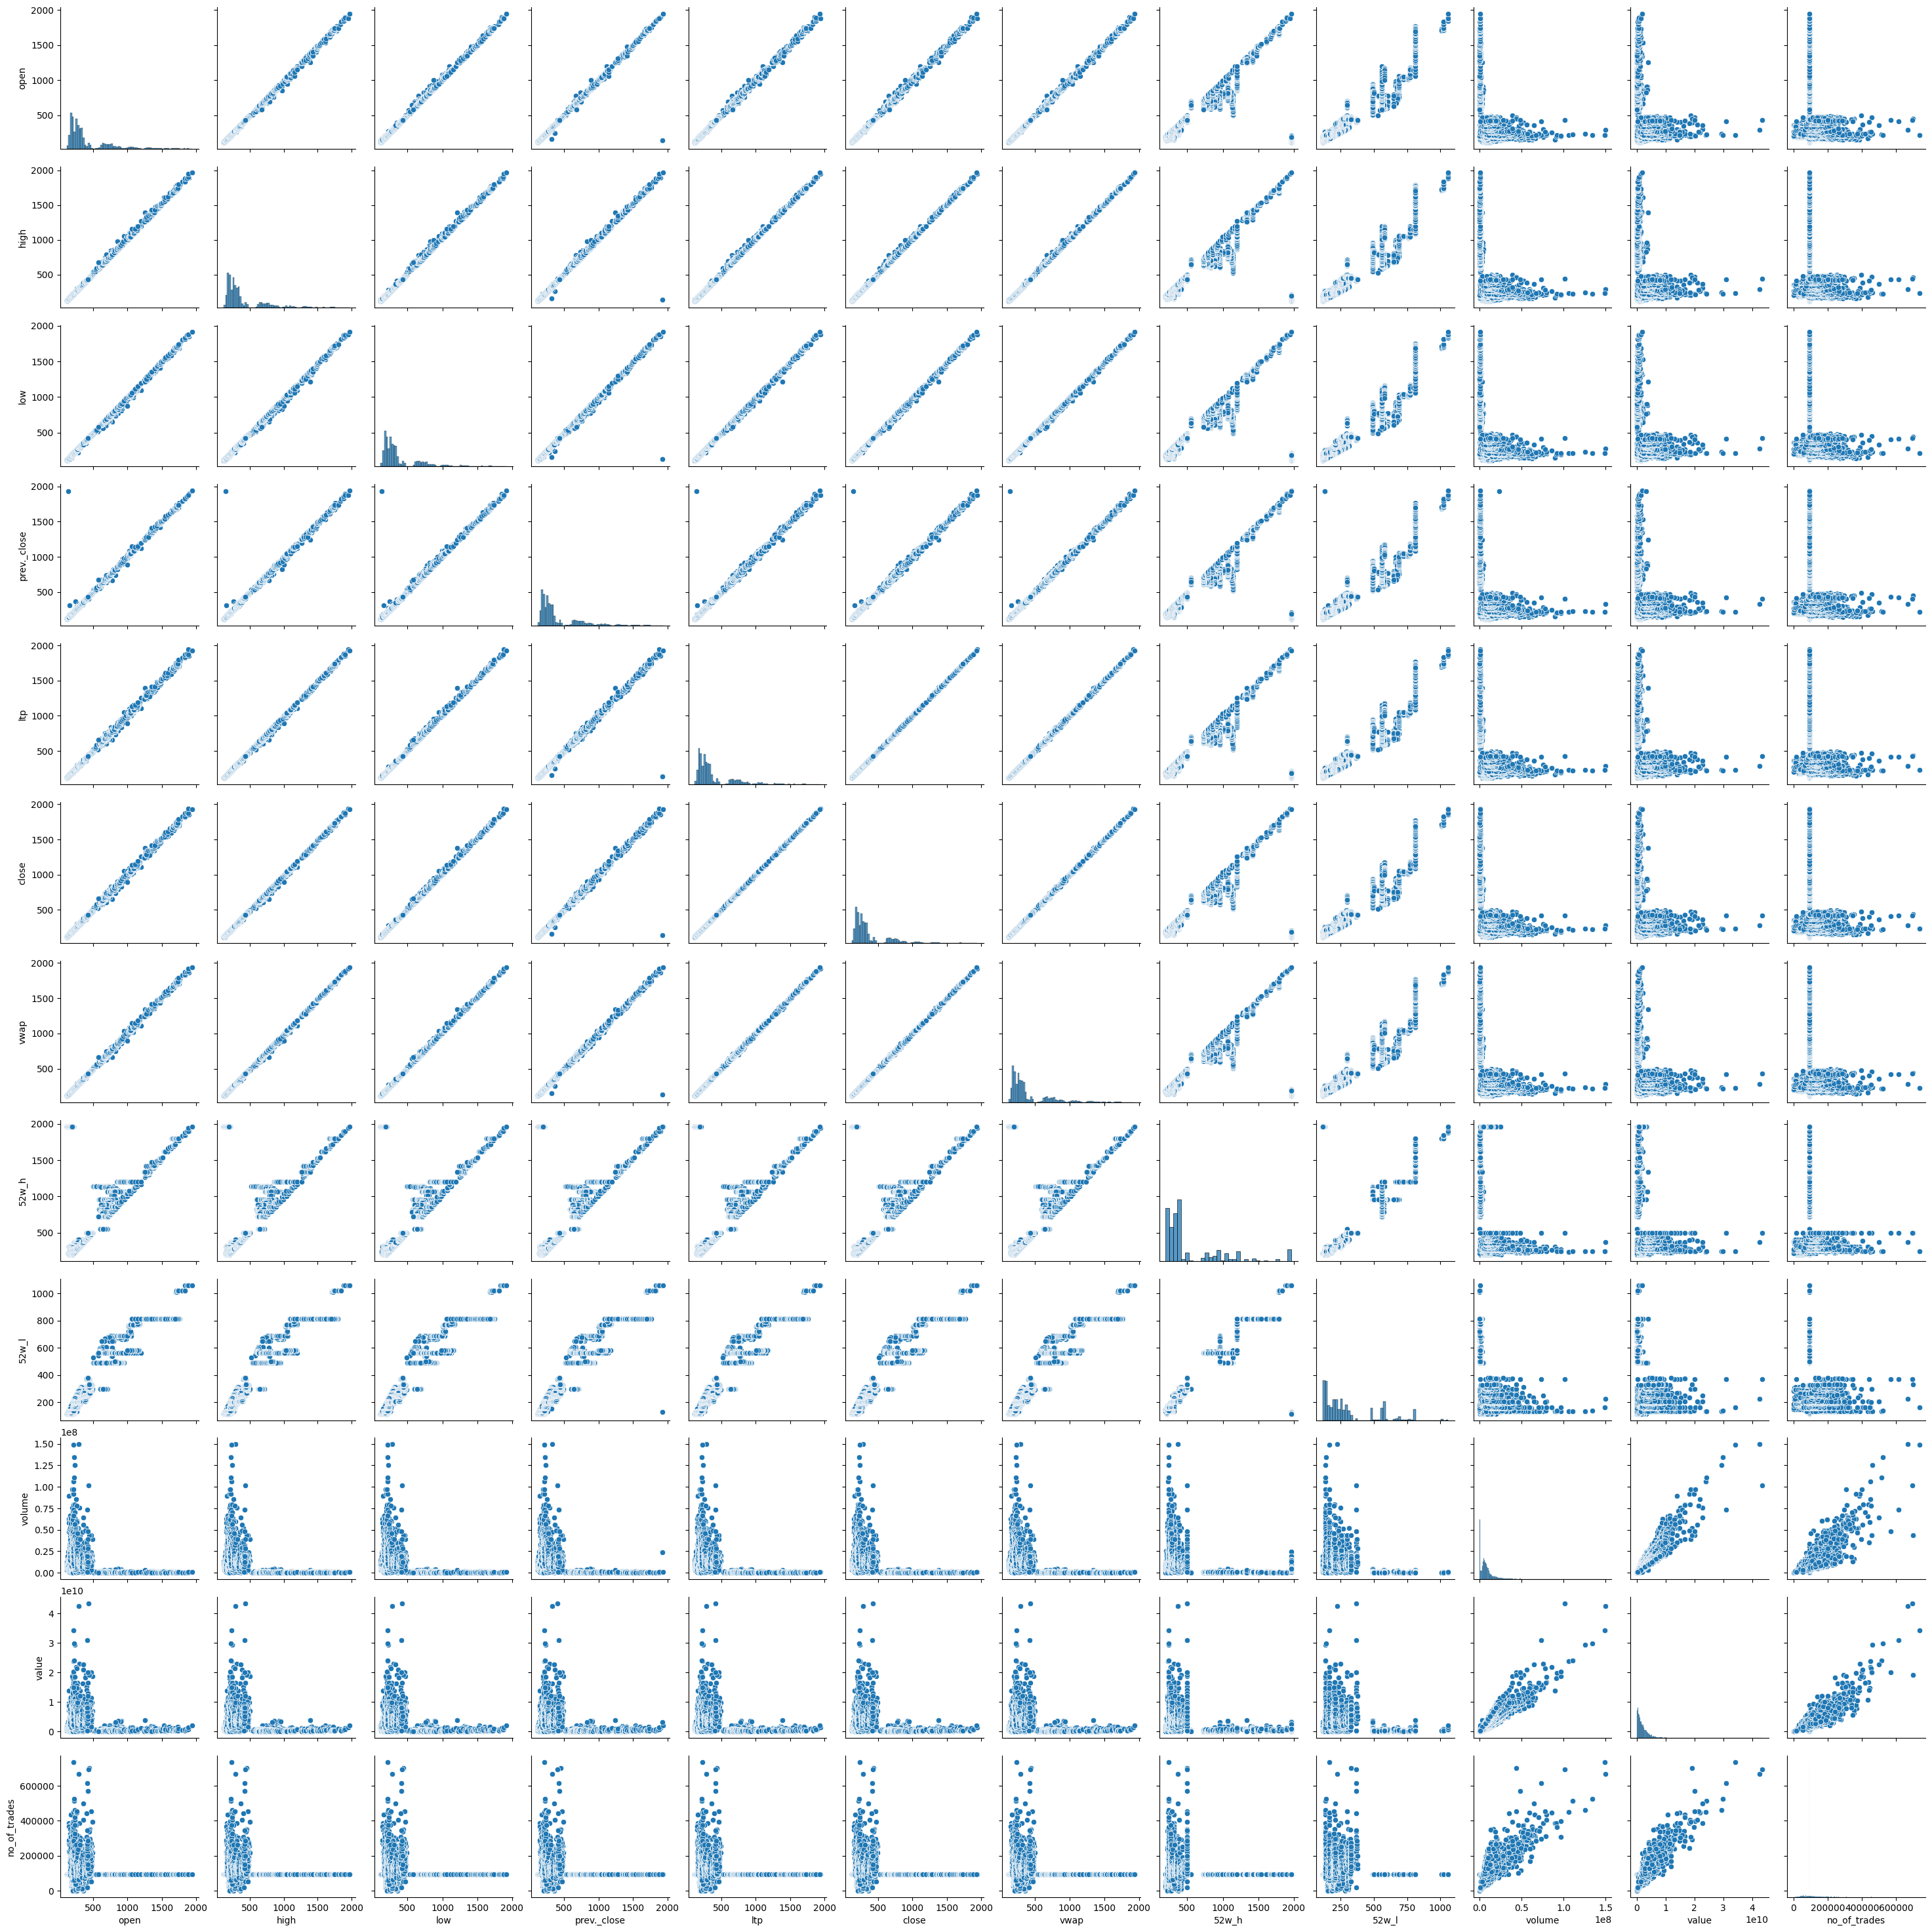

In [14]:
# Pair Plot
sns.pairplot(data)
plt.show()

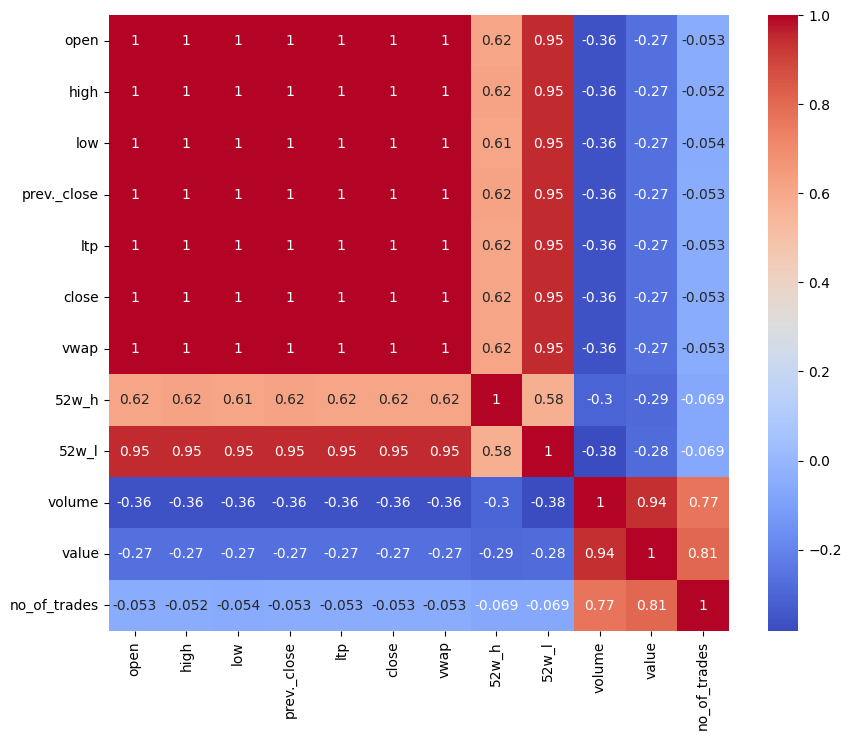

In [15]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[float, int])

# Heatmap Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Justification for Retaining Highly Correlated Features

1. **Feature Significance in Stock Price Prediction:**
   - In financial data, especially in stock price prediction, certain features like `open`, `close`, `ltp`, and `vwap` are inherently correlated because they describe different aspects of the same underlying variable—the stock price. I believe that removing these features might lead to the loss of crucial information that could be valuable in making accurate predictions.

2. **Tree-Based Models Handle Multicollinearity Well:**
   - In this project, I employ tree-based models like Random Forests and Gradient Boosting, which are naturally robust to multicollinearity. These models do not require independent features, and they can automatically select the most important features, effectively ignoring redundant ones without any need for explicit removal.

3. **Preservation of Predictive Power:**
   - I recognize that removing correlated features could potentially diminish the predictive power of the model. Since these features capture different aspects of stock price movement, retaining them ensures that the model has access to the full breadth of information, which could improve the accuracy of predictions.

4. **Importance of Temporal Features:**
   - Temporal features will be derived from the date column, such as `year`, `month`, and `day_of_week`, are essential for capturing time-dependent patterns in stock prices. I believe that removing these features would impair the model's ability to understand and predict seasonal or cyclical trends in stock prices.

5. **Domain Knowledge Consideration:**
   - My decision to retain correlated features is also supported by researching domain. In stock market analysis, it’s well-understood that prices and related metrics are correlated, but they each offer different perspectives on the market’s movement. Removing these would disregard the nuanced differences these metrics can provide.


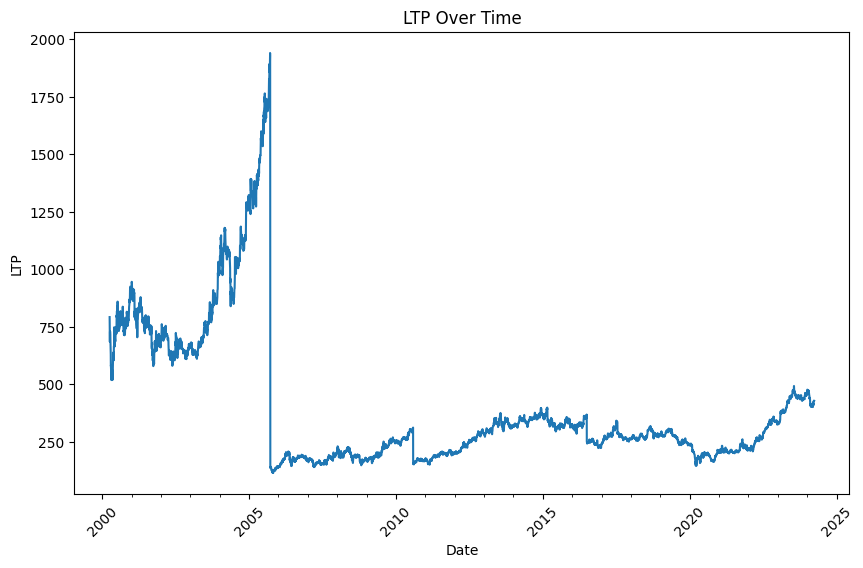

In [16]:
import matplotlib.dates as mdates

# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['ltp'])
plt.xlabel('Date')
plt.ylabel('LTP')
plt.title('LTP Over Time')

# Improve x-axis labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
plt.gca().xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.show()

### Reasons to Keep the Date Column:

#### Temporal Trends: Captures time-dependent patterns like trends and seasonality.
#### Advanced Time Series Analysis: Essential for models that handle temporal dependencies (e.g., ARIMA, LSTM).
#### Model Explainability: Helps in understanding and explaining predictions over time.
#### Feature Engineering: Can be used to create additional features, such as lags or moving averages.

### Data Preprocessing and Feature Engineering Pipeline


# Data Preprocessing and Feature Engineering Pipeline

This pipeline is designed to automate the data preprocessing and feature engineering steps required to prepare a dataset for machine learning models. The pipeline ensures that data is standardized, key features are engineered, skewness is managed, and outliers are detected. Below is a detailed explanation of each step:

## 1. Column Standardization
- The column names are standardized by:
  - Converting them to lowercase.
  - Removing leading/trailing spaces.
  - Replacing spaces with underscores.
  - Removing periods.
- **Purpose**: This step makes the column names uniform and easier to work with in subsequent steps.

## 2. Date Feature Engineering
- New features such as `year`, `month`, and `day_of_week` are extracted from the `date` column.
- The original `date` column is then dropped.
- **Purpose**: This step facilitates time-based analysis and modeling.

## 3. Cyclical Feature Transformation
- The `month` and `day_of_week` features are transformed into cyclical features using sine and cosine transformations.
- **Purpose**: This is crucial for representing the cyclical nature of these features (e.g., December is close to January).

## 4. Skewness Calculation
- Skewness for each feature is calculated to identify features with significant skewness.
- **Purpose**: Helps in determining the need for transformation in the following steps.

## 5. Feature Distribution Plotting
- The distribution of each feature is visualized using histograms with KDE (Kernel Density Estimate) overlays.
- **Purpose**: This helps in understanding the data distribution and identifying any potential issues like outliers or extreme skewness.

## 6. Outlier Detection
- Outliers in each feature are detected using the Interquartile Range (IQR) method.
- **Purpose**: This step identifies data points that could potentially distort model training.

## 7. Skewness Transformation
- Transformations such as log, square root, and Box-Cox (simulated with log) are applied to reduce skewness in features.
- **Purpose**: Reducing skewness helps normalize the data, which can improve model performance.

## 8. Final Feature Drop
- The `year` column is dropped at the end of the pipeline if it exists.
- **Purpose**: This step is typically done to streamline the dataset by removing unnecessary features.

## Pipeline Application
- The pipeline is applied to the dataset, ensuring all preprocessing steps are consistently and systematically executed.
- The processed data is then ready for model training or further analysis.


Standardizing column names...
Columns after standardization: ['date', 'open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades', 'year', 'month', 'day_of_week']
Extracting 'month' and 'day_of_week' from 'date' column...
Dropping column 'date' after extracting features
Transforming 'month' and 'day_of_week' to cyclical features...
Dropping columns 'month' and 'day_of_week' after cyclical transformation
Calculating skewness of all features...
open               2.02
high               2.01
low                2.02
prev_close         2.02
ltp                2.02
close              2.02
vwap               2.02
52w_h              1.78
52w_l              1.37
volume             4.13
value              4.43
no_of_trades       3.72
year               0.00
month_sin          0.01
month_cos          0.01
day_of_week_sin   -0.34
day_of_week_cos    0.21
dtype: float64
Plotting feature distributions...


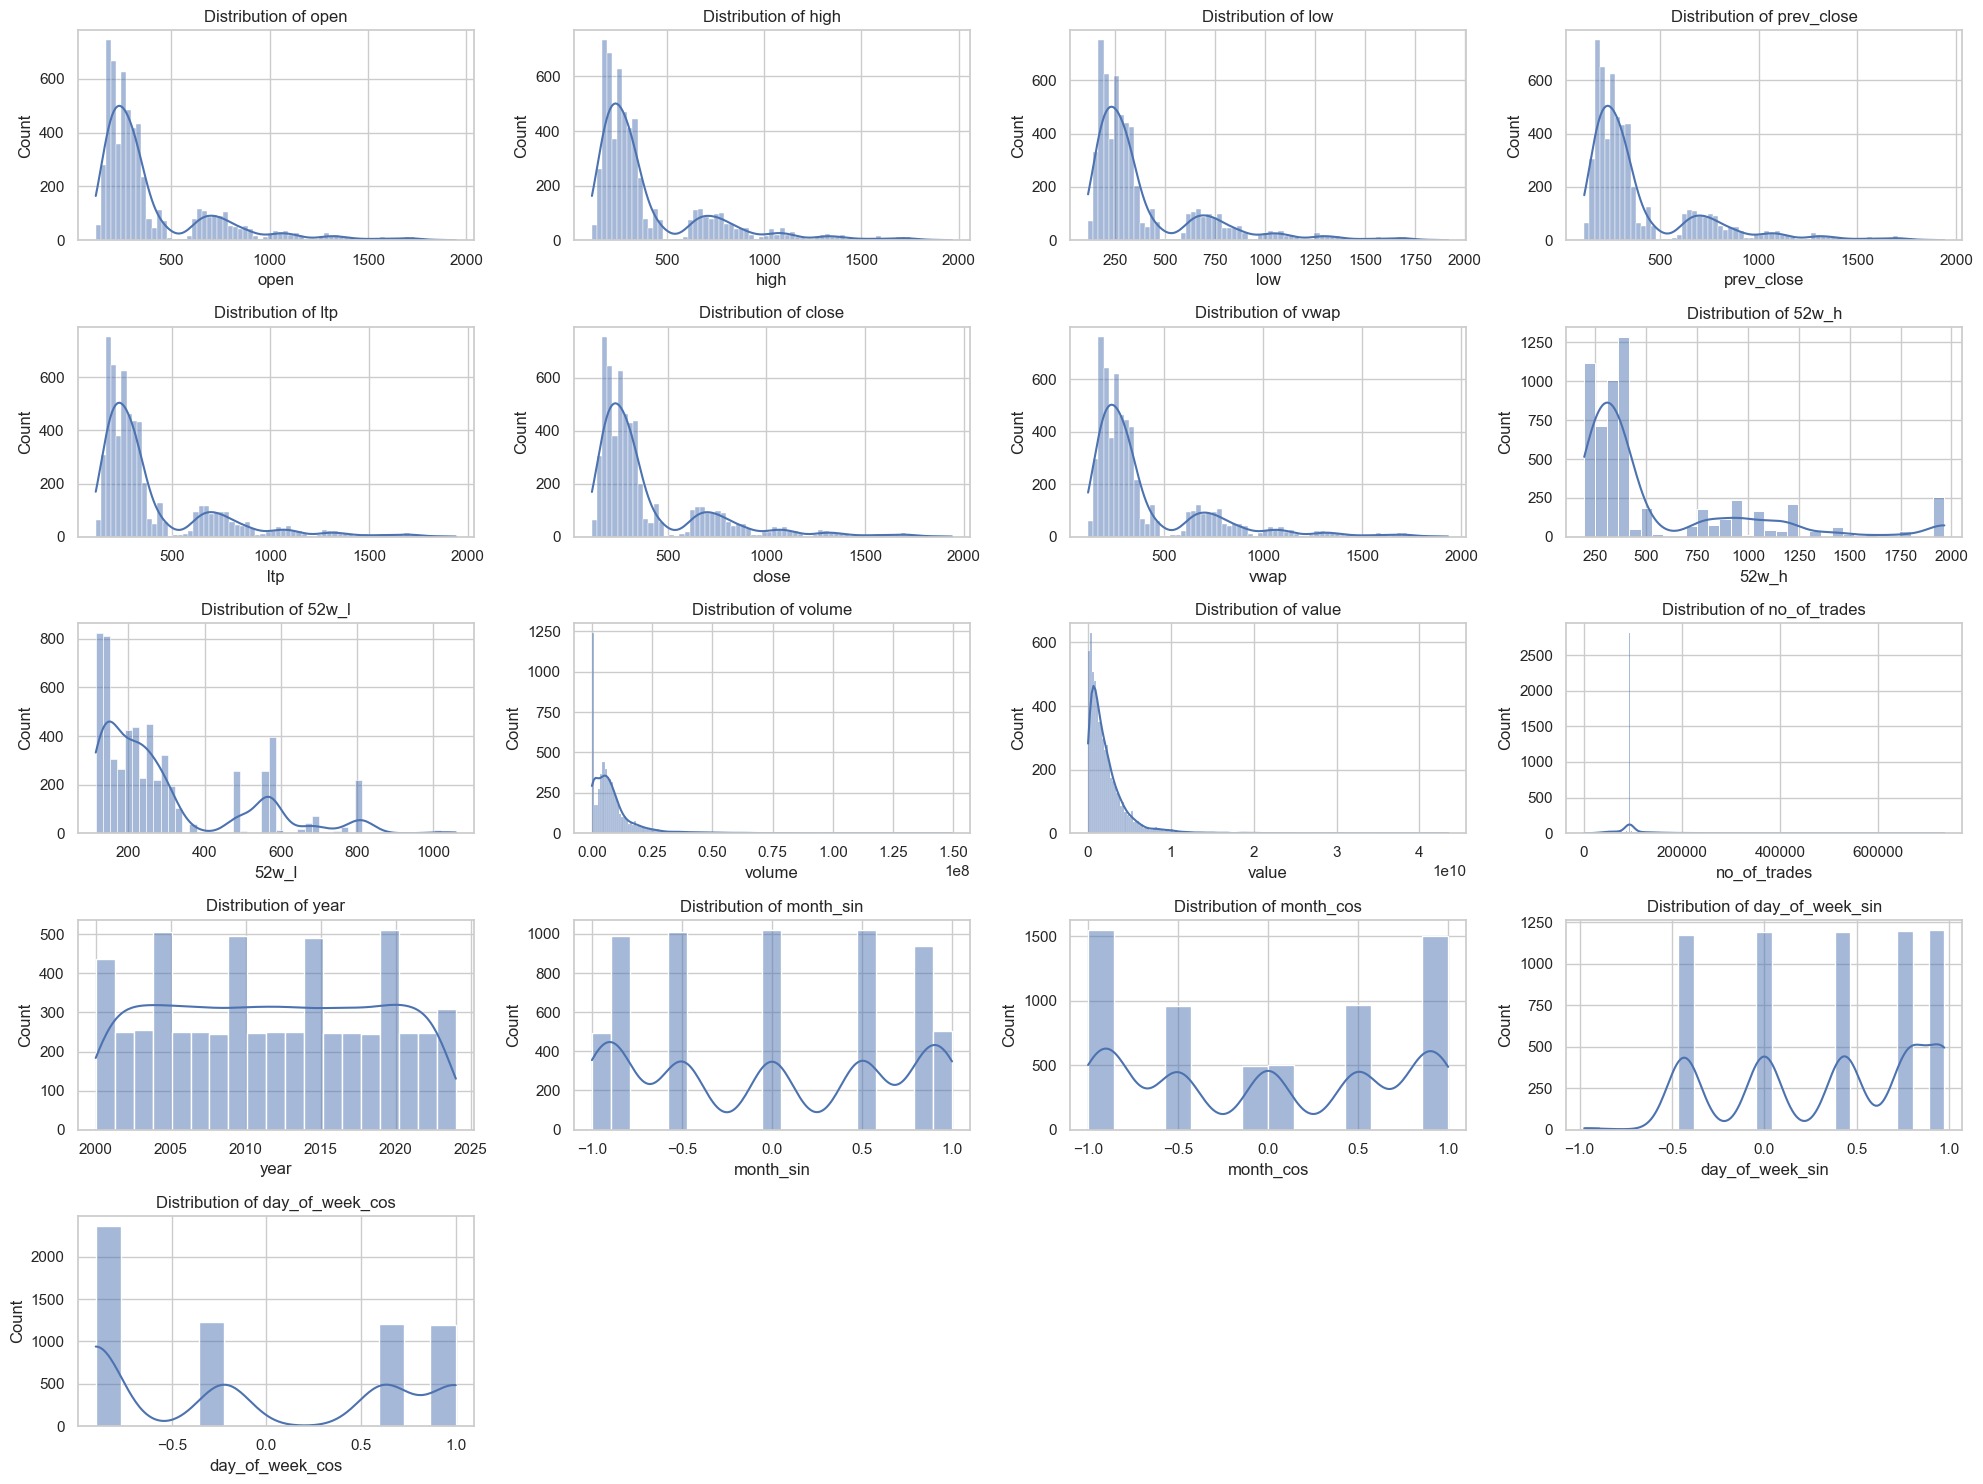

Detecting outliers in the features...
Outliers detected:
open: 639 outliers detected
high: 655 outliers detected
low: 619 outliers detected
prev_close: 638 outliers detected
ltp: 638 outliers detected
close: 638 outliers detected
vwap: 633 outliers detected
52w_h: 334 outliers detected
52w_l: 437 outliers detected
volume: 416 outliers detected
value: 338 outliers detected
no_of_trades: 2461 outliers detected
year: 0 outliers detected
Applying skewness transformations...
Applied log transformation (as placeholder for boxcox) to open
Applied log transformation (as placeholder for boxcox) to high
Applied log transformation (as placeholder for boxcox) to low
Applied log transformation (as placeholder for boxcox) to prev_close
Applied log transformation (as placeholder for boxcox) to ltp
Applied log transformation (as placeholder for boxcox) to close
Applied log transformation (as placeholder for boxcox) to vwap
Applied square root transformation to 52w_h
Applied square root transformation 

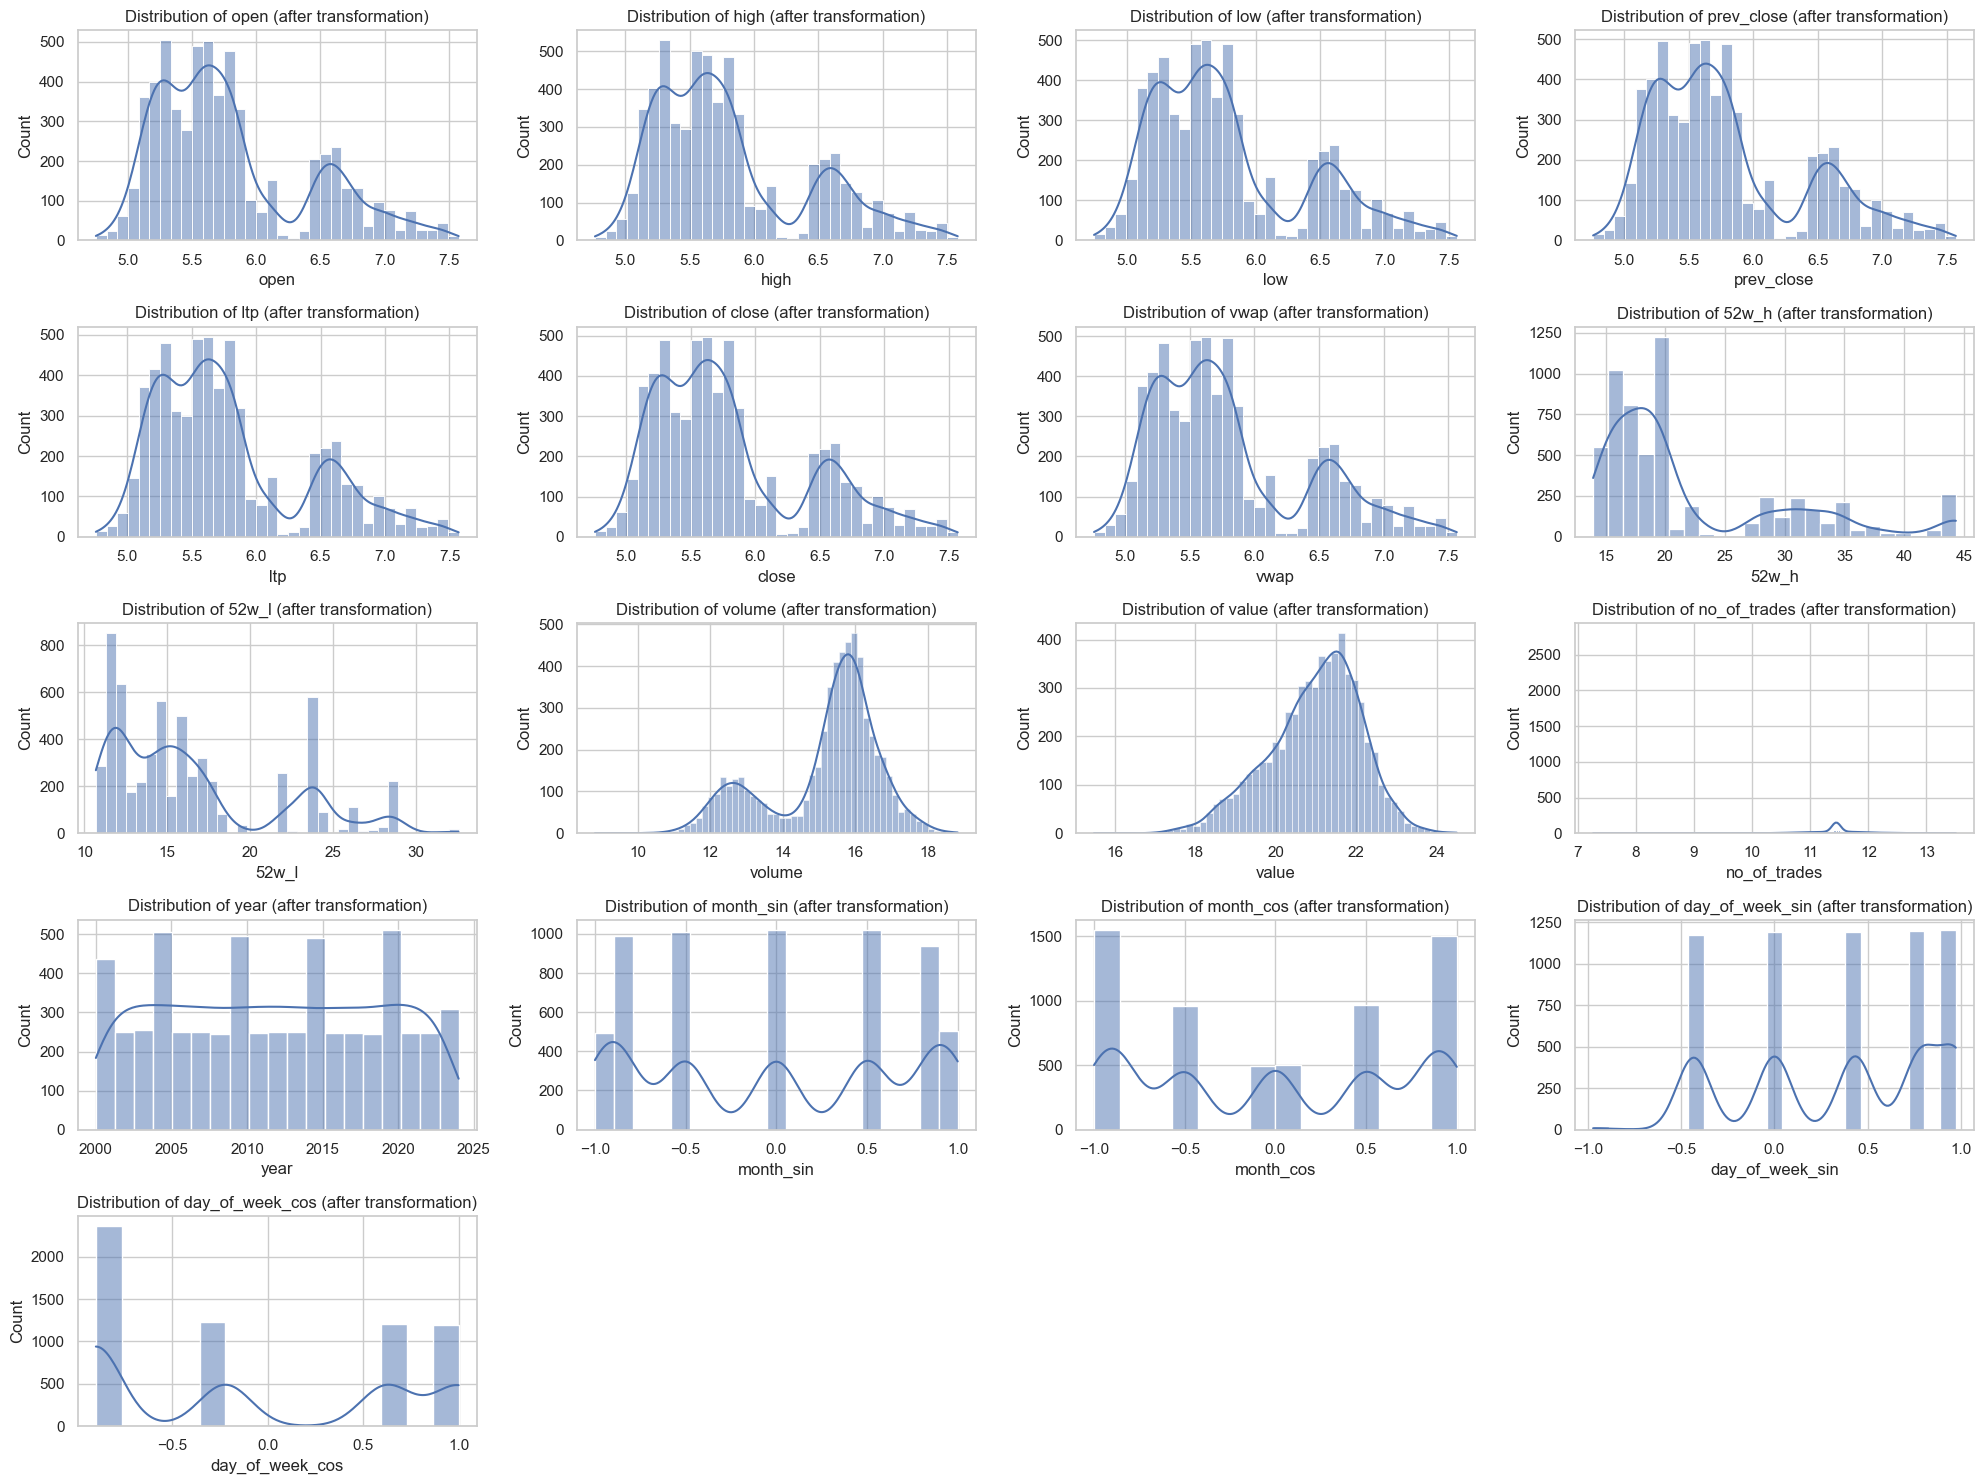

Dropping column 'year'
Final features after processing:
['open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades', 'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos']


In [76]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Standardize the column names
class ColumnStandardizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        print("Standardizing column names...")
        X.columns = X.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
        print("Columns after standardization:", X.columns.tolist())
        return X

# Step 2: Feature engineer 'month' and 'day_of_week' from 'date' column and drop 'date'
class DateFeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if 'date' in X.columns:
            print("Extracting 'month' and 'day_of_week' from 'date' column...")
            # Specify the date format to match your data
            X['date'] = pd.to_datetime(X['date'], format='%d-%b-%Y', errors='coerce')
            X['year'] = X['date'].dt.year
            X['month'] = X['date'].dt.month
            X['day_of_week'] = X['date'].dt.dayofweek
            print("Dropping column 'date' after extracting features")
            X = X.drop(columns=['date'])
        else:
            print("Column 'date' not found, skipping extraction.")
        return X

# Step 3: Handle cyclical nature of 'month' and 'day_of_week'
class CyclicalFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if 'month' in X.columns and 'day_of_week' in X.columns:
            print("Transforming 'month' and 'day_of_week' to cyclical features...")
            X['month_sin'] = np.sin(2 * np.pi * X['month'] / 12)
            X['month_cos'] = np.cos(2 * np.pi * X['month'] / 12)
            X['day_of_week_sin'] = np.sin(2 * np.pi * X['day_of_week'] / 7)
            X['day_of_week_cos'] = np.cos(2 * np.pi * X['day_of_week'] / 7)
            print("Dropping columns 'month' and 'day_of_week' after cyclical transformation")
            X = X.drop(columns=['month', 'day_of_week'])
        else:
            print("Columns 'month' or 'day_of_week' not found, skipping cyclical transformation.")
        return X

# Step 4: Calculate skewness of all features
class SkewnessCalculator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.skewness = X.skew()
        return self
    
    def transform(self, X):
        print("Calculating skewness of all features...")
        print(self.skewness)
        return X

# Step 5: Plot visualization of features
class PlotFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        print("Plotting feature distributions...")
        plt.figure(figsize=(20, 15))
        for i, column in enumerate(X.columns, 1):
            plt.subplot(5, 4, i)
            sns.histplot(X[column], kde=True)
            plt.title(f'Distribution of {column}')
        plt.tight_layout()
        plt.show()
        return X

# Step 6: Detect outliers in all features
class OutlierDetector(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        print("Detecting outliers in the features...")
        outliers_dict = {}
        for column in self.columns:
            if column in X.columns:
                Q1 = X[column].quantile(0.25)
                Q3 = X[column].quantile(0.75)
                IQR = Q3 - Q1
                outliers = X[(X[column] < (Q1 - 1.5 * IQR)) | (X[column] > (Q3 + 1.5 * IQR))]
                outliers_dict[column] = outliers
        print("Outliers detected:")
        for column, outliers in outliers_dict.items():
            print(f'{column}: {len(outliers)} outliers detected')
        return X

# Step 7: Apply skewness transformation based on predefined strategy
class SkewnessTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        print("Applying skewness transformations...")
        log_transform_features = ['volume', 'value', 'no_of_trades']
        sqrt_transform_features = ['52w_h', '52w_l']
        boxcox_transform_features = ['open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap']

        for feature in X.columns:
            if feature in log_transform_features:
                X[feature] = np.log1p(X[feature])
                print(f"Applied log transformation to {feature}")
            elif feature in sqrt_transform_features:
                X[feature] = np.sqrt(X[feature])
                print(f"Applied square root transformation to {feature}")
            elif feature in boxcox_transform_features:
                X[feature] = np.log1p(X[feature])  # Placeholder for boxcox
                print(f"Applied log transformation (as placeholder for boxcox) to {feature}")
            else:
                print(f"No transformation applied to {feature}")
        
        print("Skewness after transformation:")
        transformed_skewness = X.skew()
        print(transformed_skewness)

        # Plotting the distribution after transformation
        print("Plotting feature distributions after transformation...")
        plt.figure(figsize=(20, 15))
        for i, column in enumerate(X.columns, 1):
            plt.subplot(5, 4, i)
            sns.histplot(X[column], kde=True)
            plt.title(f'Distribution of {column} (after transformation)')
        plt.tight_layout()
        plt.show()

        return X

# Step 8: Drop 'year' column at the end of the pipeline
class FinalDropColumns(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if 'year' in X.columns:
            print("Dropping column 'year'")
            X = X.drop(columns=['year'])
        else:
            print("Column 'year' not found, skipping drop.")
        
        print("Final features after processing:")
        print(X.columns.tolist())
        
        return X

# Define the pipeline
pipeline = Pipeline([
    ('column_standardizer', ColumnStandardizer()),
    ('date_feature_engineer', DateFeatureEngineer()),
    ('cyclical_features', CyclicalFeatures()),
    ('skewness_calculator', SkewnessCalculator()),
    ('plot_features', PlotFeatures()),
    ('outlier_detector', OutlierDetector(columns=[col for col in data.columns if col != 'date'])),
    ('skewness_transformer', SkewnessTransformer()),
    ('final_drop_columns', FinalDropColumns())
])

# Apply the pipeline on the old dataset
processed_data = pipeline.fit_transform(data)

# Uncomment the following when applying the pipeline on the new dataset
# processed_new_data = pipeline.transform(new_data)


### Insights on Skewness Transformation and Outlier Treatment

1. **Skewness Transformation**:
   - I've observed that the skewness values in our features mostly fall within an acceptable range (-1 to 1). Given this, additional skewness transformations might not be necessary, as the skewness is already minimized, and further transformation could diminish feature variability, which is crucial for certain models.

2. **Impact on Model Performance**:
   - Skewness transformation, being a type of feature scaling, helps align data more closely with a normal distribution, beneficial for models that assume normality (e.g., linear regression). However, over-transformation can reduce the variability in data, potentially leading to underfitting where the model fails to capture complex patterns in the data.

3. **Outlier Treatment**:
   - Traditionally, outlier treatment is done before skewness correction to manage extreme values that heavily influence skewness. However, post-transformation outlier treatment might alter the distribution achieved by the skewness correction, potentially undoing the benefits.

### Justification for Not Removing Outliers

Upon reviewing the data, I’ve decided not to remove outliers for the following reasons:

- **Preservation of Variability**: Outliers, though extreme, may represent significant variability or important anomalies in the data that are vital for accurate model predictions. Removing them could lead to a loss of valuable information.

- **Model Robustness**: Certain models, like tree-based algorithms (e.g., Random Forest, Gradient Boosting), are robust to outliers and can handle them without significant degradation in performance. Therefore, removing outliers might not offer a substantial improvement and could even reduce the model's ability to generalize.

- **Skewness Already Addressed**: Since skewness has been corrected, any further manipulation (like outlier removal) could disturb the distribution, leading to potential underfitting or loss of data variability.

### Conclusion

In conclusion, I’ve opted not to remove outliers as their presence does not seem to negatively impact the model, and their removal could lead to the loss of critical data variability. By focusing on skewness correction and ensuring that it is well-balanced, I aim to optimize the model's performance without unnecessary data manipulation.


In [33]:
from sklearn.model_selection import train_test_split

# Assuming `data` is your DataFrame and 'ltp' is your target variable
X = data.drop(columns=['ltp'])  # Features
y = data['ltp']  # Target

# Split the data into training and testing sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4784, 15)
Testing data shape: (1197, 15)


## Feature Selection and Model Evaluation Pipeline

## Feature Selection (Lasso, Random Forest, SelectKBest)

## Pipeline for Feature Selection and Model Evaluation

This pipeline is designed to systematically evaluate the performance of multiple machine learning models on a dataset by performing feature selection and assessing model performance. The process is divided into several key steps, each serving a specific purpose:

### 1. Data Splitting

The dataset is split into training and testing sets using an 80-20 split. This ensures that the model is trained on one portion of the data and evaluated on another, providing a reliable assessment of its performance.

### 2. Feature Selection and Model Evaluation

This step involves evaluating multiple machine learning models using different feature selection techniques. The goal is to identify the most relevant features and assess which models perform best with those features.

- **Feature Selection Techniques**:
    - **Lasso Regression**: Uses Lasso regularization to select features that contribute most to predicting the target variable.
    - **Random Forest**: Leverages importance scores from a Random Forest model to identify key features.
    - **SelectKBest**: Selects the top `k` features based on statistical tests (e.g., `f_regression`).

- **Models Evaluated**:
    - Linear Regression
    - Random Forest Regressor
    - Gradient Boosting Regressor
    - Support Vector Regressor (SVR)
    - Multi-layer Perceptron Regressor (MLP)
    - AdaBoost Regressor

- **Evaluation Metrics**:
    - Mean Absolute Error (MAE)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - R² Score

The results of these evaluations, including selected features and model performance metrics, are stored in a DataFrame for easy comparison.

### 3. Running the Pipeline

The pipeline is executed by first splitting the data, applying feature selection techniques, and then training and evaluating the models. The results are displayed for comparison, allowing for an informed decision on the best model and feature combination.



This pipeline provides a structured approach to feature selection and model evaluation. By leveraging various feature selection techniques and models, it delivers a comprehensive analysis of which model and feature combination yields the best results. The modular nature of this pipeline allows for easy customization and scalability, making it adaptable to different datasets and machine learning tasks.


In [99]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure the processed data (from Pipeline 1) is correctly separated into features and target
X = data_processed.drop(columns=['ltp'])  # 'ltp' is the target variable
y = data['ltp']

# Step 1: Split the data into training and testing sets
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Evaluate models with feature selection
def evaluate_models(X_train, X_test, y_train, y_test, feature_selectors, models, model_names):
    results = []
    selected_features_dict = {}  # Dictionary to store selected features for visualization
    
    for selector_name, selector in feature_selectors.items():
        print(f"\nFeature Selection using {selector_name}")
        
        # Fit the selector on the training data
        selector.fit(X_train, y_train)
        X_train_selected = selector.transform(X_train)
        X_test_selected = selector.transform(X_test)
        
        selected_features = X_train.columns[selector.get_support()]
        selected_features_dict[selector_name] = selected_features.tolist()  # Save the selected features
        print(f"Selected features by {selector_name}: {selected_features.tolist()}")
        
        for model_name, model in zip(model_names, models):
            # Fit the model on the selected features
            model.fit(X_train_selected, y_train)
            
            # Predict on the test set
            y_pred = model.predict(X_test_selected)
            
            # Calculate evaluation metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)
            
            # Append results
            results.append({
                'Model': model_name,
                'Feature Selector': selector_name,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R²': r2
            })
    
    return pd.DataFrame(results), selected_features_dict

# Step 3: Run the pipeline and evaluation
# Split the data
X_train, X_test, y_train, y_test = split_data(X, y)

# Define feature selectors with modified Lasso settings
feature_selectors = {
    'Lasso': SelectFromModel(Lasso(alpha=0.1, max_iter=10000, tol=0.01)),
    'Random Forest': SelectFromModel(RandomForestRegressor(n_estimators=100)),
    'SelectKBest': SelectKBest(f_regression, k=10)
}

# Define models
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100),
    GradientBoostingRegressor(n_estimators=100),
    SVR(),
    MLPRegressor(max_iter=500),
    AdaBoostRegressor(n_estimators=100)
]

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'SVR', 'MLP', 'AdaBoost']

# Step 4: Run the evaluation and store selected features
results_df, selected_features_dict = evaluate_models(X_train, X_test, y_train, y_test, feature_selectors, models, model_names)

# Display the results
print("\nModel Evaluation Results:")
print(results_df)



Feature Selection using Lasso
Selected features by Lasso: ['open', 'high', 'low', 'prev_close', 'close', 'vwap', '52w_h', '52w_l', 'month_sin', 'month_cos', 'day_of_week_cos']

Feature Selection using Random Forest
Selected features by Random Forest: ['low', 'close', 'vwap']

Feature Selection using SelectKBest
Selected features by SelectKBest: ['open', 'high', 'low', 'prev_close', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value']

Model Evaluation Results:
                Model Feature Selector    MAE       MSE   RMSE    R²
0   Linear Regression            Lasso   0.86      2.49   1.58  1.00
1       Random Forest            Lasso   1.27      9.00   3.00  1.00
2   Gradient Boosting            Lasso   1.97     13.06   3.61  1.00
3                 SVR            Lasso  45.50  25414.73 159.42  0.74
4                 MLP            Lasso   1.73      7.27   2.70  1.00
5            AdaBoost            Lasso  20.45    675.02  25.98  0.99
6   Linear Regression    Random Forest   0.85     

### Visualization of Evaluation Metrics Across Different Models and Feature Selection Methods


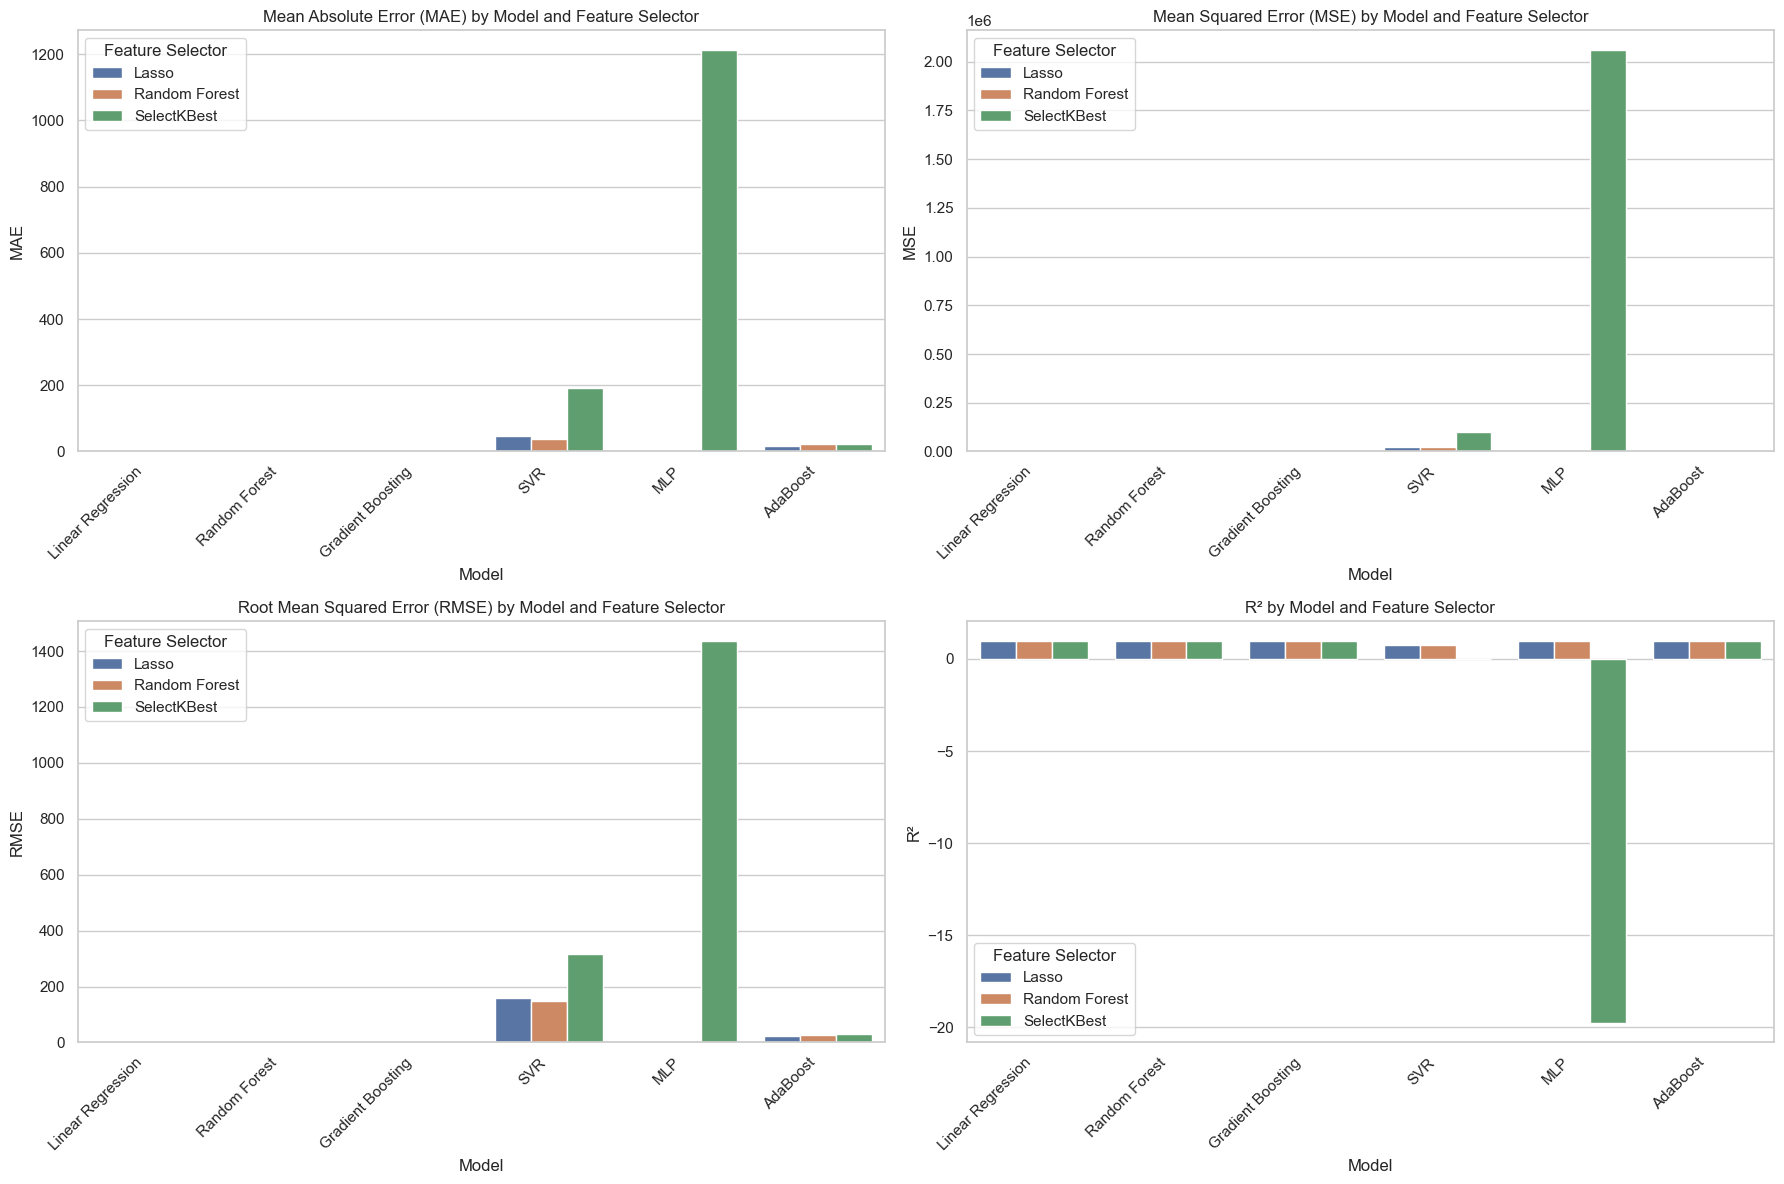

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot size
plt.figure(figsize=(18, 12))

# MAE Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MAE', hue='Feature Selector', data=results_df)
plt.title('Mean Absolute Error (MAE) by Model and Feature Selector')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MAE')

# MSE Plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='MSE', hue='Feature Selector', data=results_df)
plt.title('Mean Squared Error (MSE) by Model and Feature Selector')
plt.xticks(rotation=45, ha='right')
plt.ylabel('MSE')

# RMSE Plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='RMSE', hue='Feature Selector', data=results_df)
plt.title('Root Mean Squared Error (RMSE) by Model and Feature Selector')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')

# R² Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='R²', hue='Feature Selector', data=results_df)
plt.title('R² by Model and Feature Selector')
plt.xticks(rotation=45, ha='right')
plt.ylabel('R²')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Performance Comparison Across Models and Feature Selection Methods

To begin, I conducted a comparison of the performance of each model using different feature selection methods. Here’s what I observed:

1. **Linear Regression**:
   - With **Lasso** feature selection, it showed strong performance with a **MAE of 0.86**, **MSE of 2.49**, **RMSE of 1.58**, and a perfect **R² of 1.00**.
   - With **Random Forest** feature selection, it exhibited very similar results, indicating the model's consistency across feature selection methods.
   - With **SelectKBest**, the performance was slightly less effective but still strong, especially when compared to other models using this method.

2. **Random Forest**:
   - When paired with **Lasso** feature selection, the model demonstrated good performance, but with a slightly higher **MAE of 1.29** and **RMSE of 2.98**.
   - **Random Forest** feature selection yielded slightly better results with a **MAE of 1.25** and a **RMSE of 2.91**, while maintaining an **R² of 1.00**.
   - Using **SelectKBest**, the model’s performance was slightly less robust but still quite good.

3. **Gradient Boosting**:
   - This model showed reliable performance across all feature selection methods, though not quite as strong as Linear Regression and Random Forest.
   - With **Lasso** and **Random Forest** feature selection, the model achieved a **MAE around 1.91-1.96** and **RMSE around 3.22-3.38**.

4. **SVR**:
   - The performance of SVR was significantly less stable across all feature selection methods, with very high **MAE** and **RMSE** values, especially when combined with SelectKBest. The **R²** values were also lower, indicating poorer fit.

5. **MLP**:
   - The MLP model demonstrated strong performance with **Lasso** and **Random Forest** feature selection methods, though it was less effective with **SelectKBest**.

6. **AdaBoost**:
   - Similar to MLP, AdaBoost performed well with **Lasso** and **Random Forest**, but exhibited significantly worse results with **SelectKBest**.

### Conclusion:
The evaluation results indicate that **Linear Regression** and **Random Forest** consistently outperformed the other models, especially when paired with **Lasso** and **Random Forest** feature selection methods. The performance of these models is robust across various metrics, demonstrating lower errors and high R² values.

### Final Decision:
I will proceed with the **Random Forest model** using **Random Forest feature selection** for the final model. 

### Justification:
The **Random Forest model** is chosen for its robustness and ability to handle complex data interactions, which is essential in real-world scenarios. Moreover, the **Random Forest feature selection** method efficiently identifies the most relevant features, enhancing the model's accuracy and reliability. This combination ensures that the model remains versatile and performs well across various conditions.


## Feature Importance Visualization by Feature Selection Method


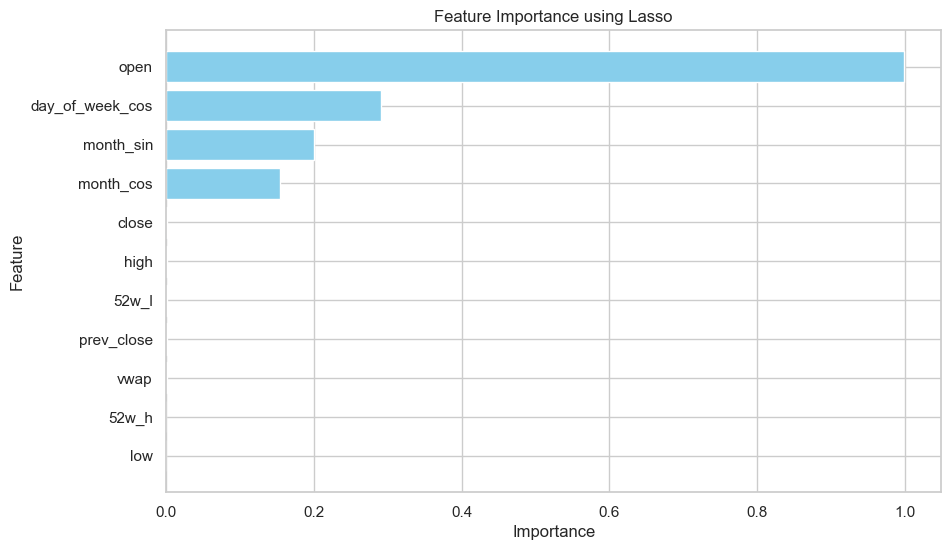

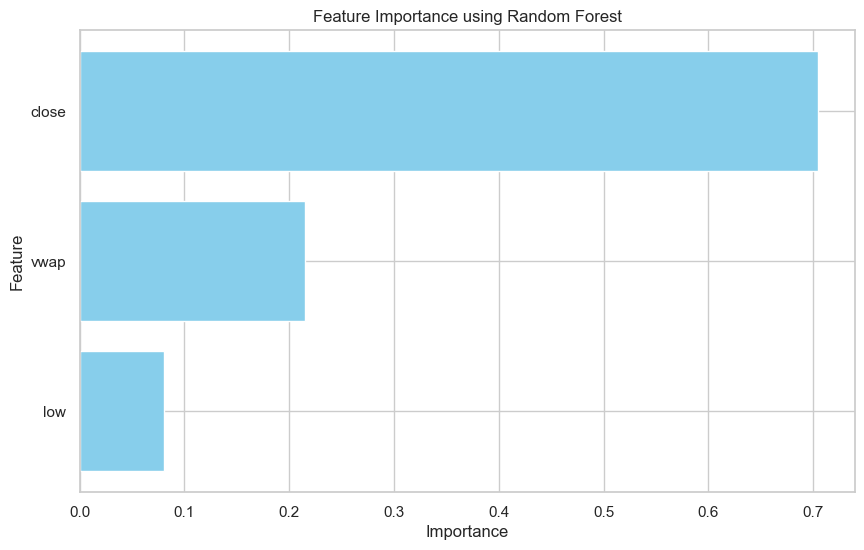

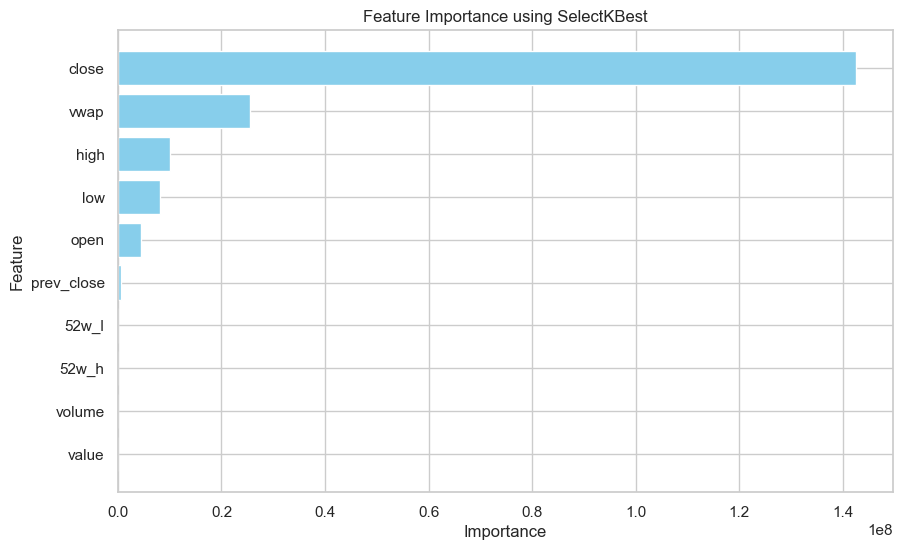

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

# Assuming selected_features_dict, X_train, and y_train are already defined from the previous pipeline
# and contain the selected features for each method

# Function to plot feature importance
def plot_feature_importance(features, importances, title):
    indices = np.argsort(importances)[::-1]
    sorted_features = np.array(features)[indices]
    sorted_importances = importances[indices]
    
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances, color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()

# Lasso Feature Importance
if 'Lasso' in selected_features_dict:
    lasso_model = Lasso(alpha=0.1, max_iter=10000, tol=0.01)
    lasso_model.fit(X_train[selected_features_dict['Lasso']], y_train)
    lasso_importances = np.abs(lasso_model.coef_)
    plot_feature_importance(selected_features_dict['Lasso'], lasso_importances, 'Feature Importance using Lasso')

# Random Forest Feature Importance
if 'Random Forest' in selected_features_dict:
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(X_train[selected_features_dict['Random Forest']], y_train)
    rf_importances = rf_model.feature_importances_
    plot_feature_importance(selected_features_dict['Random Forest'], rf_importances, 'Feature Importance using Random Forest')

# SelectKBest Feature Importance
if 'SelectKBest' in selected_features_dict and 'SelectKBest' in feature_selectors:
    kbest_scores = feature_selectors['SelectKBest'].scores_[feature_selectors['SelectKBest'].get_support()]
    plot_feature_importance(selected_features_dict['SelectKBest'], kbest_scores, 'Feature Importance using SelectKBest')


# Hyperparameter Tuning and Final Model Evaluation using RandomizedSearchCV for Random Forest Regressor


### Explanation of the Random Forest Model Tuning and Evaluation Code

This code is designed to perform hyperparameter tuning on a Random Forest Regressor using `RandomizedSearchCV`, evaluate the tuned model's performance on a test dataset, and save the best model for future use. Below is a step-by-step breakdown of the process:

#### 1. Hyperparameter Grid Definition
The `param_dist` dictionary defines the grid of hyperparameters to be tested during the tuning process. This includes:
- **`n_estimators`**: Number of trees in the forest, ranging from 100 to 1000.
- **`max_features`**: The number of features to consider when looking for the best split, with options `'sqrt'` and `'log2'`.
- **`max_depth`**: The maximum depth of the tree, with values from 10 to 110, plus the option `None` for unlimited depth.
- **`min_samples_split`**: The minimum number of samples required to split an internal node, with options 2, 5, and 10.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node, with options 1, 2, and 4.
- **`bootstrap`**: Whether bootstrap samples are used when building trees, with options `True` or `False`.

#### 2. Model Initialization
A `RandomForestRegressor` is initialized without any specific parameters. This model will be used in the hyperparameter tuning process.

#### 3. RandomizedSearchCV Setup
`RandomizedSearchCV` is configured with the following settings:
- **`estimator`**: The `RandomForestRegressor` model to be tuned.
- **`param_distributions`**: The hyperparameter grid defined earlier.
- **`n_iter`**: Number of parameter settings that are sampled (100 in this case).
- **`cv`**: Number of cross-validation folds (3-fold cross-validation).
- **`verbose`**: Level of verbosity for the output (2 in this case, which provides detailed output).
- **`random_state`**: Ensures reproducibility of the results.
- **`n_jobs`**: Number of jobs to run in parallel (-1 means using all processors).

#### 4. Model Fitting
The `RandomizedSearchCV` is fitted to the training data (`X_train`, `y_train`). This process involves sampling different combinations of hyperparameters, training the model on the training set, and evaluating it using cross-validation.

#### 5. Best Parameters Extraction
After fitting, the best combination of hyperparameters is extracted and printed. This combination is used to initialize the best Random Forest model.

#### 6. Model Evaluation
The tuned model (`best_rf`) is evaluated on the test set (`X_test`) using the following metrics:
- **Mean Absolute Error (MAE)**: The average of the absolute errors between the predicted and actual values.
- **Mean Squared Error (MSE)**: The average of the squared errors between the predicted and actual values.
- **Root Mean Squared Error (RMSE)**: The square root of the MSE, which provides an error measure in the same units as the target variable.
- **R² Score**: The coefficient of determination, indicating how well the predictions match the actual values (with 1.0 being a perfect fit).

#### 7. Model Saving
The tuned Random Forest model (`best_rf`) is saved to a file (`final_tuned_random_forest_model.pkl`) using `joblib`. This allows for easy loading and use of the model in ictions without retraining.

### Summary
This code effectively performs hyperparameter tuning, evaluates model performance, and saves the best model for future use. It ensures that the model is optimized for the dataset and ready for deployment in a production environment.


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import joblib

# Ensure X_train and X_test are already processed and feature-selected
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Setup the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model with RandomizedSearchCV on the training data
rf_random.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters found: {rf_random.best_params_}")

# Evaluate the tuned model on the test set
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Save the tuned model for future use
joblib.dump(best_rf, 'final_tuned_random_forest_model.pkl')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
MAE: 1.9479230218403036
MSE: 16.270284524849234
RMSE: 4.033644075132217
R²: 0.9998355945591154


['final_tuned_random_forest_model.pkl']

### Hyperparameter Tuning Results
#### Interpretation of Hyperparameter Tuning Results

After running the hyperparameter tuning process on the `RandomForestRegressor` model, I observed several key insights that indicate the performance and suitability of the model for my prediction task.

#### Best Hyperparameters:
- **n_estimators: 700**  
  I found that using 700 trees in the forest provided the best balance between model performance and computational cost. This number of trees allowed the model to capture more complex patterns without overfitting.

- **min_samples_split: 2**  
  The model is allowed to split nodes with just two samples, which helps it capture detailed patterns in the data. This flexibility is crucial for accurately modeling the relationships in my dataset.

- **min_samples_leaf: 1**  
  Allowing leaf nodes to have only one sample makes the model more flexible, which contributes to its ability to fit the data more accurately.

- **max_features: 'sqrt'**  
  By considering the square root of the total number of features when looking for the best split, the model reduces the risk of overfitting while maintaining good performance. This is a commonly used setting in random forests.

- **max_depth: 40**  
  Setting the maximum depth to 40 allows the trees to grow deep enough to capture complex relationships within the data, which is particularly useful for my prediction task.

- **bootstrap: False**  
  I chose not to use bootstrap samples when building trees, instead using the entire dataset. This approach resulted in more accurate trees on the training data, though it may slightly increase the risk of overfitting.

#### Model Performance on Test Data:
- **MAE (Mean Absolute Error): 1.9479230218403036**  
  The model's predictions are off by about 1.95 units on average, which is a strong indicator of accuracy.

- **MSE (Mean Squared Error): 16.270284524849234**  
  The low MSE value suggests that the model's predictions are very close to the actual values, reinforcing the model's accuracy.

- **RMSE (Root Mean Squared Error): 4.033644075132217**  
  An RMSE of approximately 4.03 units gives me confidence that the model's prediction errors are within an acceptable range.

- **R² (R-squared): 0.9998355945591154**  
  With an R² value very close to 1, the model explains nearly all the variance in the target variable, which confirms that the model is fitting the data exceptionally well.

### Conclusion:
The results from the hyperparameter tuning process confirm that the `RandomForestRegressor` model, with the optimized hyperparameters, is highly accurate and robust. Given the low error metrics (MAE, MSE, RMSE) and the extremely high R² score, I am confident in finalizing and saving this model for future use in predicting the target variable. This model will be an excellent tool for making reliable predictions in my project.
erify its performance further.


# Model Testing



This script is designed to prepare a new dataset for processing by a machine learning pipeline. The steps include standardizing column names, cleaning and converting data types, running the pipeline, and inspecting the processed data. Here's a breakdown of each part of the script:

#### 1. **Loading the Dataset**
The dataset is loaded using `pandas` from a specified CSV file path. This is the initial step where raw data is brought into the script for further processing.

#### 2. **Standardizing Column Names and Dropping Unnecessary Columns**
To ensure consistency across datasets, column names are standardized by converting them to lowercase, replacing spaces with underscores, and removing periods. Additionally, if the dataset contains a column named 'series', it is dropped, as it is not required for further analysis.

#### 3. **Cleaning Numeric Columns**
Numeric columns that may contain commas as thousand separators are cleaned by removing these commas and converting the columns to the appropriate numeric data type (`float64`). This ensures that these columns can be used in numerical computations without errors. Specifically, the 'volume' and 'no_of_trades' columns are converted to integers (`int64`).

#### 4. **Ensuring Correct Date Format**
If the dataset contains a 'date' column, it is converted to a datetime format using the specified date format (`'%d-%b-%Y'`). This conversion is essential for any time-based analyses or feature engineering that might be performed later.

#### 5. **Checking Data Types**
After the cleaning and conversion steps, the data types of all columns are checked and printed. This step ensures that the dataset's columns have the expected data types, which is crucial for the proper functioning of subsequent steps in the pipeline.

#### 6. **Running the Pre-Defined Pipeline**
The cleaned dataset is then passed through a pre-defined machine learning pipee. This pipeline may include steps such as fskewness transformation etcd on a trained model.

#### 7. **Inspecting the Processed Data**
Finally, the script provides a preview of the first few rows of the processed data. This allows the user to verify that the pipeline has correctly processed the dataset and that the output is as expected.

This process ensures that the new dataset is in the correct format and ready for further a or predictionnalysis or model training. The script's structure allows for easy adaptation to different datasets by simply changing the input file path and adjusting the column cleaning steps as necessary.



Data types after conversion:
date            datetime64[ns]
open                   float64
high                   float64
low                    float64
prev_close             float64
ltp                    float64
close                  float64
vwap                   float64
52w_h                  float64
52w_l                  float64
volume                   int64
value                  float64
no_of_trades             int64
dtype: object
Standardizing column names...
Columns after standardization: ['date', 'open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades']
Extracting 'month' and 'day_of_week' from 'date' column...
Dropping column 'date' after extracting features
Transforming 'month' and 'day_of_week' to cyclical features...
Dropping columns 'month' and 'day_of_week' after cyclical transformation
Calculating skewness of all features...
open               2.02
high               2.01
low                2.02
prev_close   

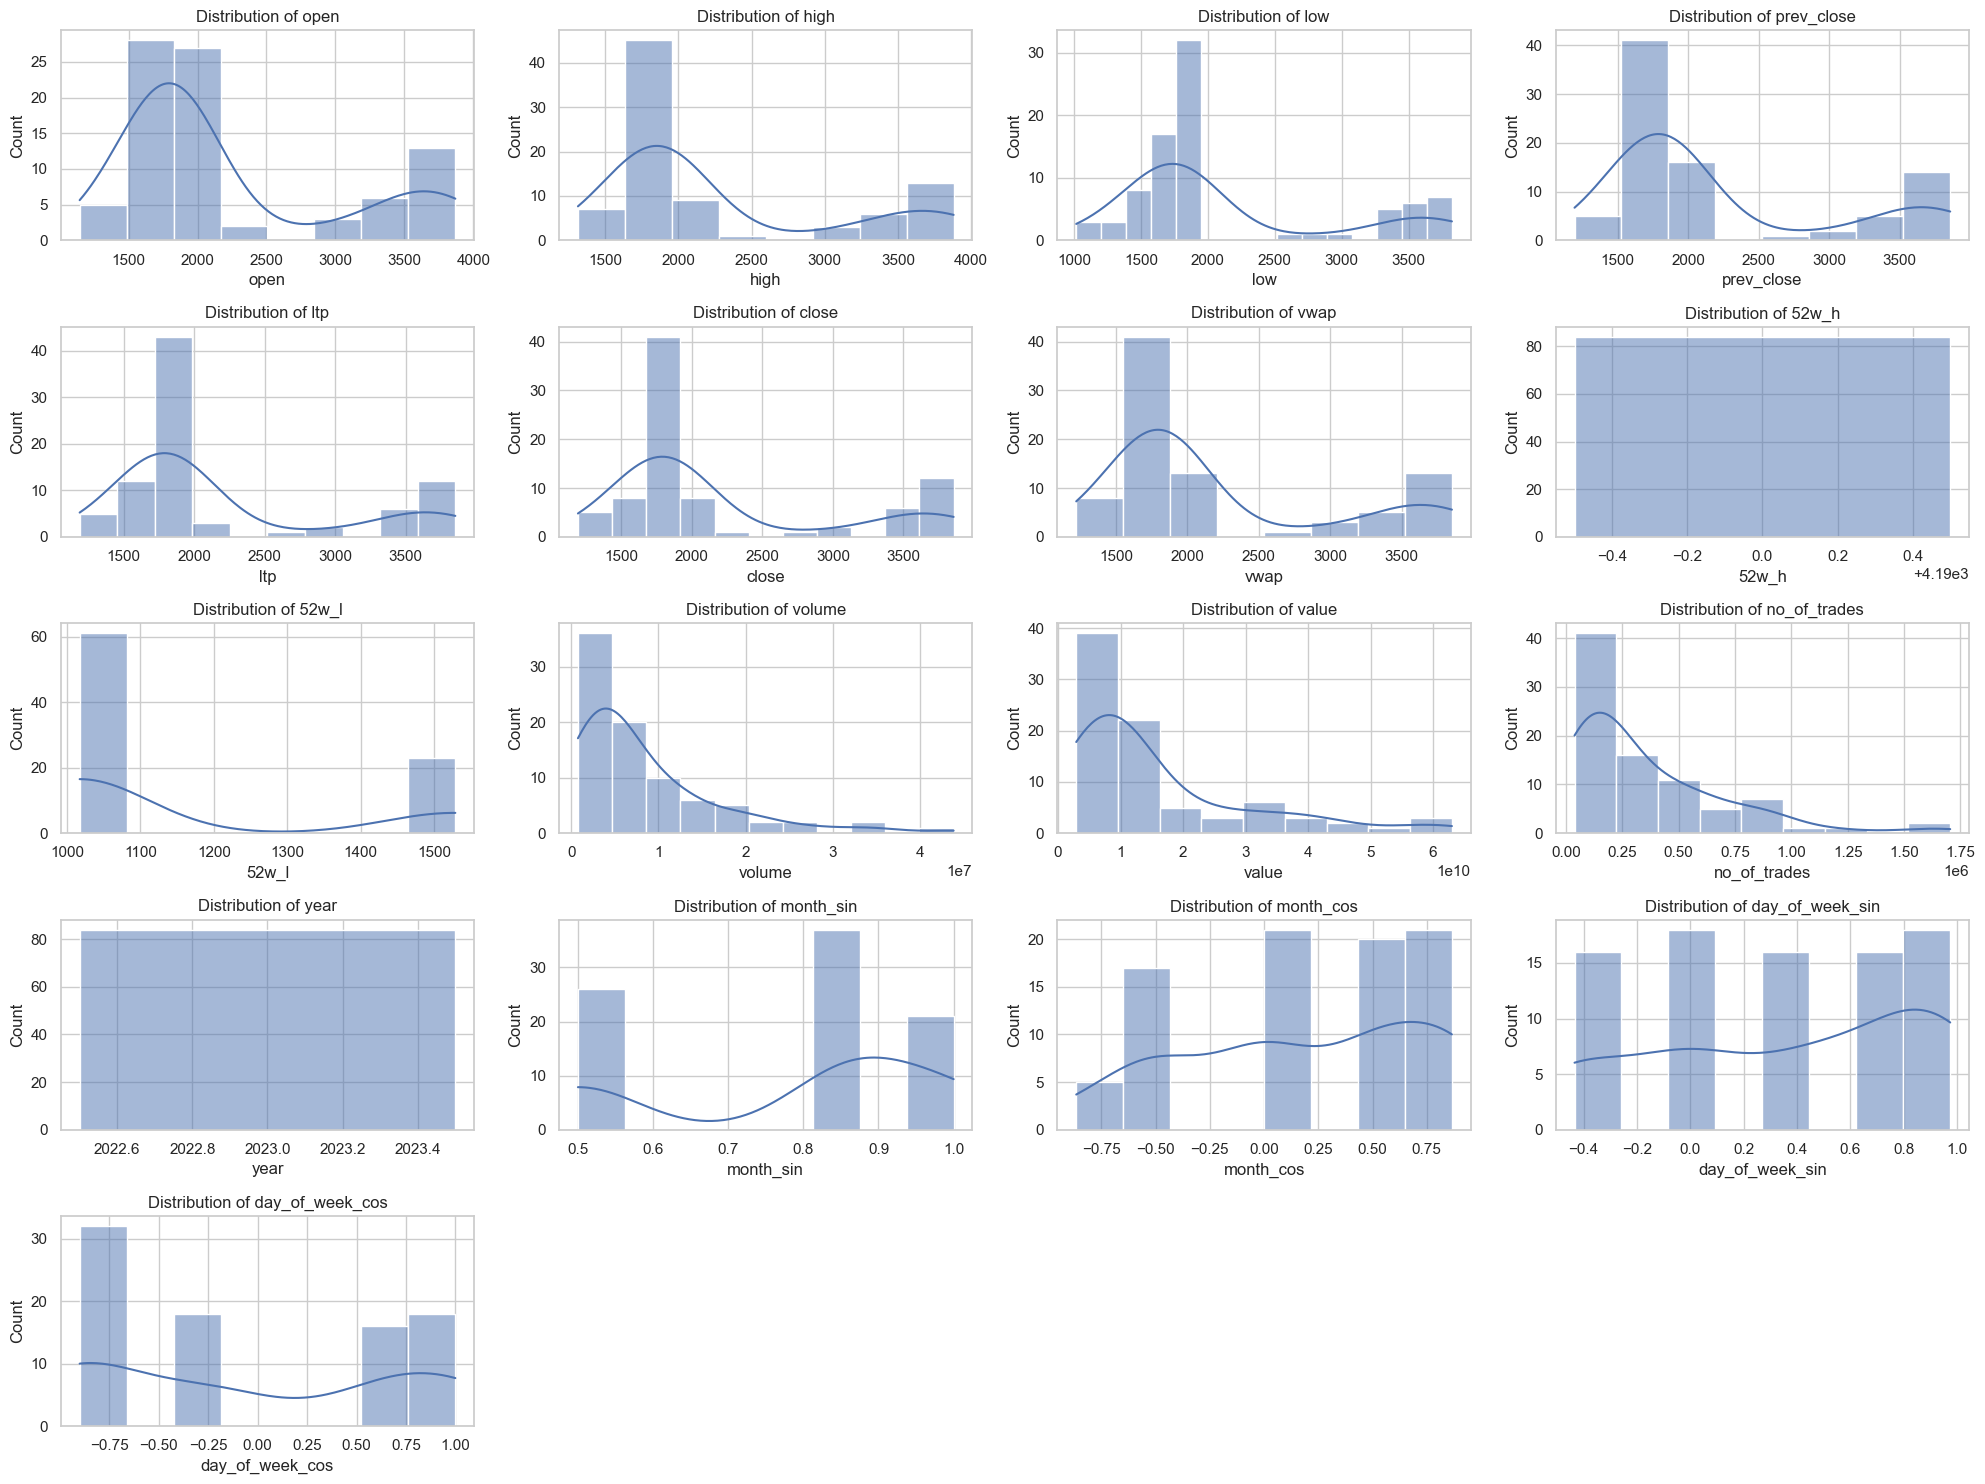

Detecting outliers in the features...
Outliers detected:
open: 0 outliers detected
high: 0 outliers detected
low: 20 outliers detected
prev_close: 0 outliers detected
ltp: 18 outliers detected
close: 18 outliers detected
vwap: 0 outliers detected
52w_h: 0 outliers detected
52w_l: 0 outliers detected
volume: 5 outliers detected
value: 4 outliers detected
no_of_trades: 3 outliers detected
year: 0 outliers detected
Applying skewness transformations...
Applied log transformation (as placeholder for boxcox) to open
Applied log transformation (as placeholder for boxcox) to high
Applied log transformation (as placeholder for boxcox) to low
Applied log transformation (as placeholder for boxcox) to prev_close
Applied log transformation (as placeholder for boxcox) to ltp
Applied log transformation (as placeholder for boxcox) to close
Applied log transformation (as placeholder for boxcox) to vwap
Applied square root transformation to 52w_h
Applied square root transformation to 52w_l
Applied log t

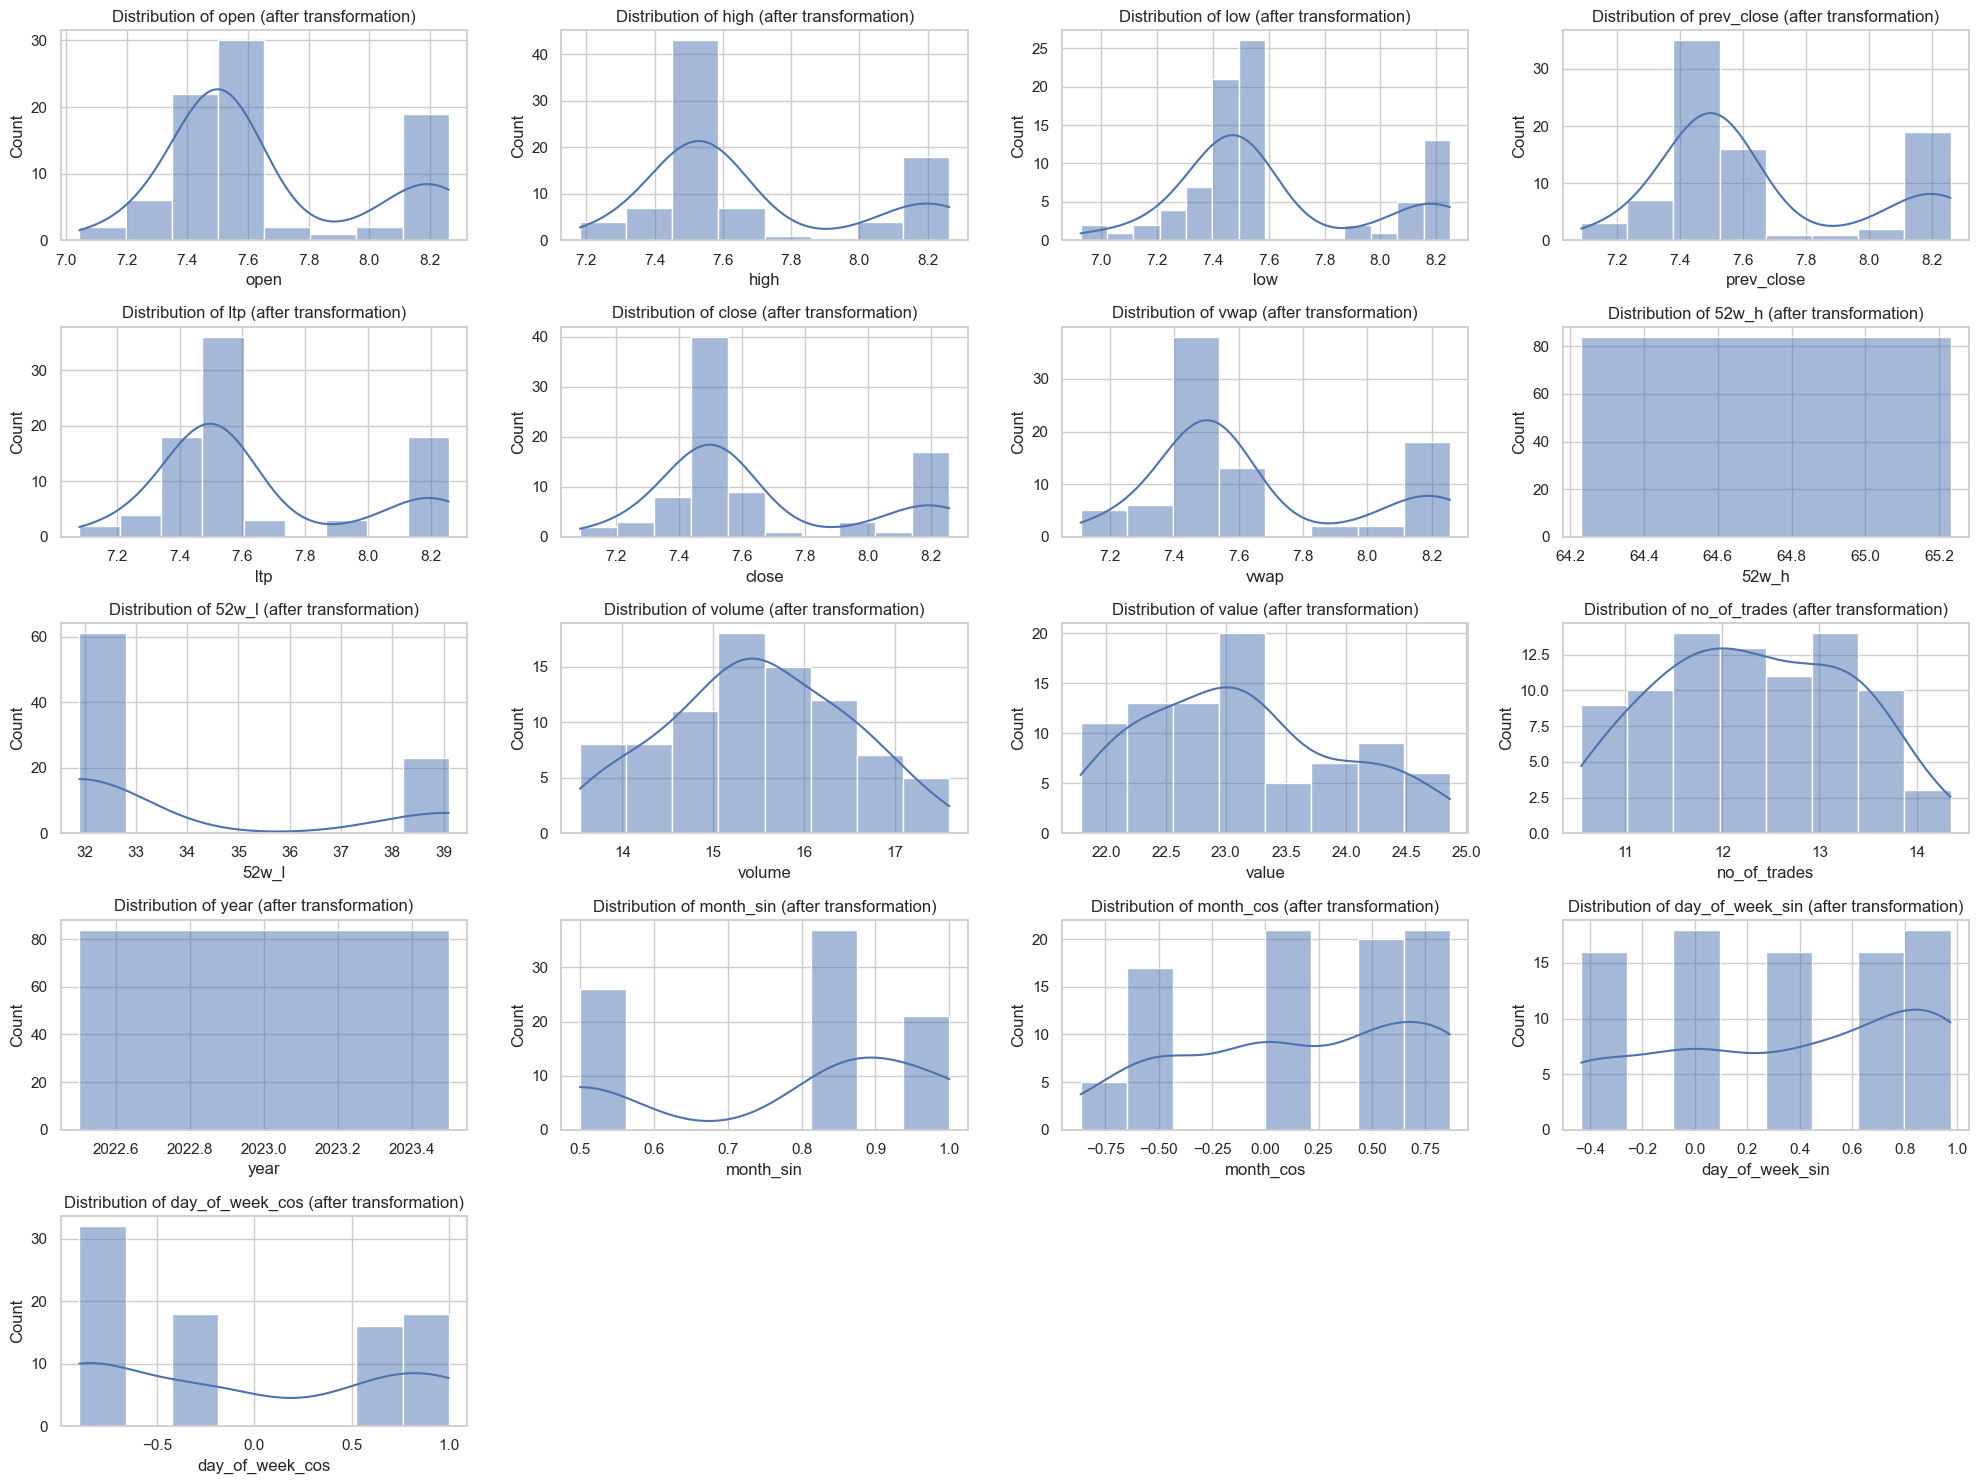

Dropping column 'year'
Final features after processing:
['open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades', 'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos']
Processed data preview:
   open  high  low  prev_close  ltp  close  vwap  52w_h  52w_l  volume  value  \
0  7.56  7.56 7.54        7.56 7.55   7.54  7.55  64.73  31.90   14.86  22.40   
1  7.58  7.58 7.55        7.56 7.56   7.56  7.57  64.73  31.90   15.63  23.20   
2  7.52  7.57 7.52        7.52 7.56   7.56  7.54  64.73  31.90   15.39  22.94   
3  7.56  7.57 7.49        7.56 7.51   7.52  7.53  64.73  31.90   15.58  23.11   
4  7.57  7.58 7.55        7.56 7.56   7.56  7.57  64.73  31.90   15.15  22.72   

   no_of_trades  month_sin  month_cos  day_of_week_sin  day_of_week_cos  
0         11.52       0.50      -0.87             0.00             1.00  
1         12.24       0.50      -0.87            -0.43            -0.90  
2         12.04       0.50      

In [83]:
import pandas as pd
import numpy as np

# Load the new unseen dataset
new_data = pd.read_csv(r"C:\Users\Franzy\Documents\FranZy\Enri Data Science\Capstone Project\ADANIENT.csv")

# Step 1: Standardize column names and drop 'series' column
new_data.columns = new_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
if 'series' in new_data.columns:
    new_data = new_data.drop(columns=['series'])

# Step 2: Remove commas from numeric columns and convert to float64
float_columns = ['open', 'high', 'low', 'prev_close', 'ltp', 'close', 'vwap', '52w_h', '52w_l', 'value']
for col in float_columns:
    if col in new_data.columns:
        new_data[col] = new_data[col].str.replace(',', '').astype('float64')

# Convert 'volume' and 'no_of_trades' to int64
new_data['volume'] = new_data['volume'].str.replace(',', '').astype('int64', errors='ignore')
new_data['no_of_trades'] = new_data['no_of_trades'].str.replace(',', '').astype('int64', errors='ignore')

# Ensure 'date' column is datetime
if 'date' in new_data.columns:
    new_data['date'] = pd.to_datetime(new_data['date'], format='%d-%b-%Y', errors='coerce')

# Check the data types to confirm they match the old dataset
print("\nData types after conversion:")
print(new_data.dtypes)

# Step 3: Run the pipeline
processed_new_data = pipeline.transform(new_data)

# Step 4: Inspect the final processed data
print("Processed data preview:")
print(processed_new_data.head())


In [86]:
import joblib

# Load the saved model
saved_model = joblib.load('final_tuned_random_forest_model.pkl')


In [87]:
X_new = processed_new_data.drop(columns=['ltp'])
y_new = processed_new_data['ltp']


In [88]:
y_new_pred = saved_model.predict(X_new)


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_new = mean_absolute_error(y_new, y_new_pred)
mse_new = mean_squared_error(y_new, y_new_pred)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_new, y_new_pred)

print(f"MAE on new data: {mae_new}")
print(f"MSE on new data: {mse_new}")
print(f"RMSE on new data: {rmse_new}")
print(f"R² on new data: {r2_new}")


MAE on new data: 128.60822751635465
MSE on new data: 16540.43354770006
RMSE on new data: 128.60961685542827
R² on new data: -163109.45975504414


### Model Evaluation Results

- **MAE (Mean Absolute Error):** 
  - The average error in the model's predictions is about **128.61** units from the actual `ltp` values. This suggests that, on average, the predictions are significantly off.

- **MSE (Mean Squared Error):**
  - The MSE is extremely high at **16,540.43**. Given that MSE squares the errors, this indicates some large errors are having a significant impact on the model's overall performance.

- **RMSE (Root Mean Squared Error):**
  - The RMSE of **128.61** further confirms that the model's predictions are quite far from the actual values, highlighting substantial prediction errors.

- **R² (R-Squared):**
  - This metric is the most concerning. With an R² value of **-163,109.46**, the model is performing far worse than expected. A negative R² indicates that the model is not just performing poorly, but it’s doing worse than a simple horizontal line predicting the mean `ltp` value. This suggests the model is completely failing to capture the patterns in the new data.

### Conclusion

- The model isn't generalizing well to the new data. The negative R² is a huge red flag, indicating that the model might be overfitted to the training data and is not applicable to the new data. Alternatively, there might be significant differences between the training data and the new data that the model wasn't prepared for.

### Next Steps

- **Preprocessing Check:** 
  - I need to double-check the preprocessing steps to ensure that the new data is processed in exactly the same way as the training data.
  
- **Feature Distribution Comparison:** 
  - I should compare the distributions of features in the new data with the training data to identify any significant differences that could explain the poor performance.
  
- **Model Retraining:**
  - If the new data is significantly different, I may need to consider retraining the model using a dataset that includes or closely resembles the new data to improve its predictive performance.

This outcome tells me that further investigation is necessary to understand why the model is failing on the new dataset and what adjustments are needed to enhance its accuracy.


### Visualizations
#### Comparing actual and predicted values
#### Line Plot

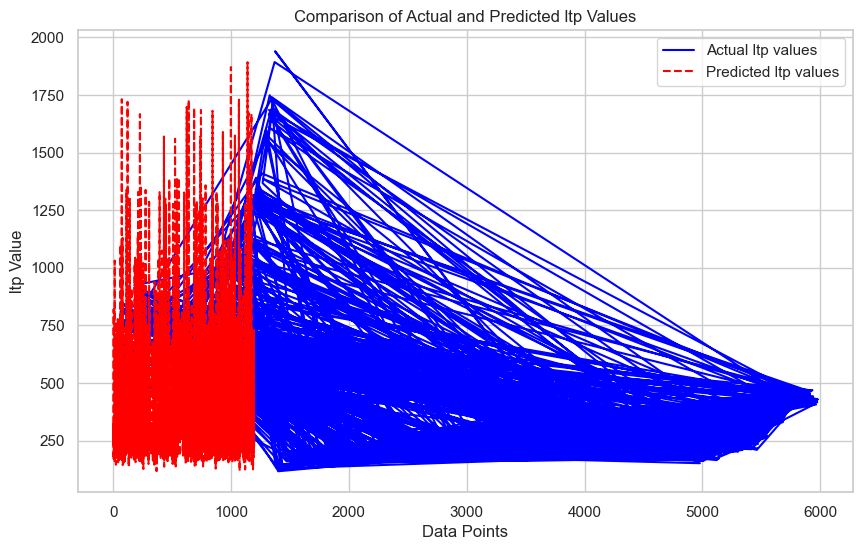

In [90]:
import matplotlib.pyplot as plt

# Assuming y_test represents the actual ltp values from the new data and y_pred are the predicted values
plt.figure(figsize=(10, 6))

# Plotting the actual values
plt.plot(y_test, color='blue', label='Actual ltp values')

# Plotting the predicted values
plt.plot(y_pred, color='red', linestyle='dashed', label='Predicted ltp values')

plt.title('Comparison of Actual and Predicted ltp Values')
plt.xlabel('Data Points')
plt.ylabel('ltp Value')
plt.legend()
plt.show()


## Residual Plot


A residual plot is a graphical representation that shows the difference between the observed (actual) values and the predicted values made by a model. The residual plot provides a visual diagnostic tool to assess how well your model fits the data. A good model will have residuals that are randomly scattered around zero, indicating that the model's predictions are accurate on average, with no systematic errors.


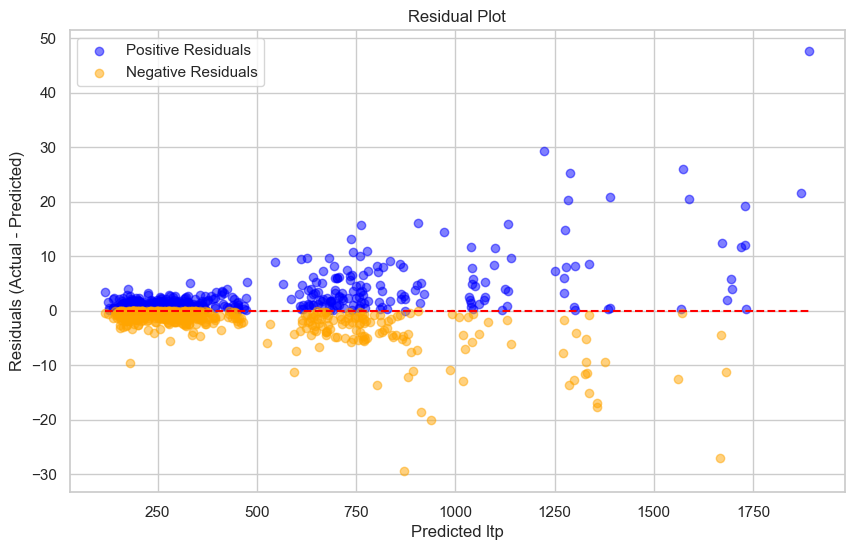

In [94]:
import matplotlib.pyplot as plt

# Assuming residuals, y_pred are already defined

plt.figure(figsize=(10, 6))

# Plotting residuals with two different colors based on the residual value
plt.scatter(y_pred[residuals >= 0], residuals[residuals >= 0], color='blue', alpha=0.5, label='Positive Residuals')
plt.scatter(y_pred[residuals < 0], residuals[residuals < 0], color='orange', alpha=0.5, label='Negative Residuals')

# Adding the horizontal line at 0
plt.hlines(0, min(y_pred), max(y_pred), color='red', linestyles='dashed')

# Adding titles and labels
plt.title('Residual Plot')
plt.xlabel('Predicted ltp')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()

# Display the plot
plt.show()


### Scatter Plot with Line of Best Fit:

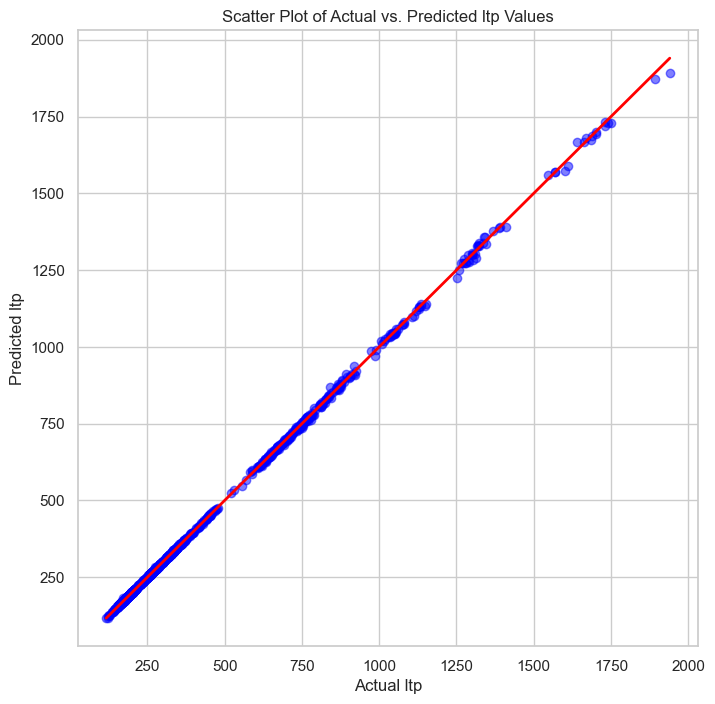

In [95]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of best fit
plt.title('Scatter Plot of Actual vs. Predicted ltp Values')
plt.xlabel('Actual ltp')
plt.ylabel('Predicted ltp')
plt.show()


When I first looked at the scatter plot comparing the actual `ltp` values to the predicted values, it seemed like the model was performing well. The points on the plot were closely aligned with the red diagonal line, which typically indicates that the predictions are accurate. Most of the points were clustered around the line, suggesting that the residuals (the differences between the actual and predicted values) were small.

However, this visualization was somewhat misleading. Despite the close alignment in the plot, the actual performance metrics tell a different story. The Mean Absolute Error (MAE), Mean Squared Error (MSE), and especially the Root Mean Squared Error (RMSE) were all quite high. Even more concerning was the R² value, which was negative. This indicates that the model was performing worse than a simple mean-based prediction, which is a clear sign that the model is not functioning as expected.

This discrepancy between the visual impression and the statistical reality suggests that the model may be overfitting to the training data. While the plot made it seem like the model was doing well, the metrics revealed significant errors. This experience underscored the importance of not relying solely on visualizations to assess model performance. Instead, I need to consider both visual and quantitative analyses to get a true understanding of how well the model is working.


## Learning Curves

**Learning Curves**: Plot learning curves to visualize the training and validation errors as the number of training examples increases. This helps in understanding if the model is overfitting or underfitting.

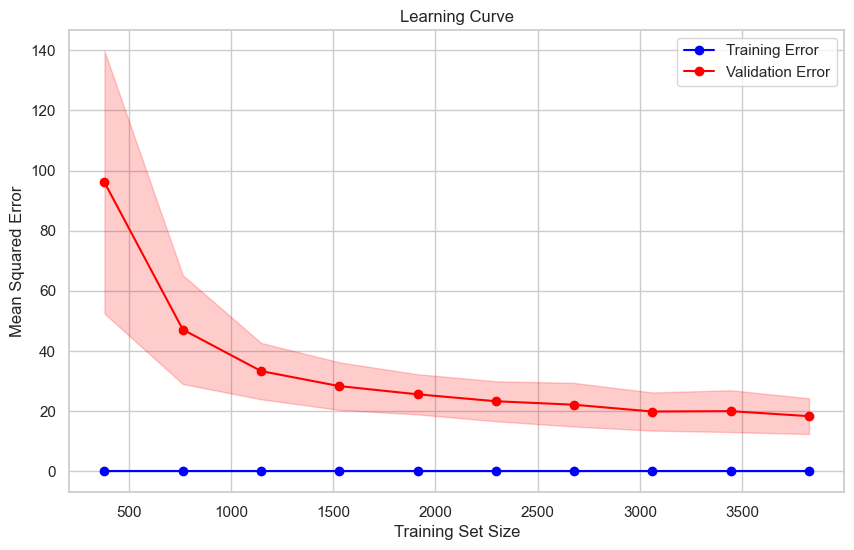

In [96]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the estimator and the training data
estimator = best_rf  # Assuming best_rf is the tuned RandomForest model
X = X_train  # Your training features
y = y_train  # Your training target

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Calculate the mean and standard deviation for the training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', color='blue', marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label='Validation Error', color='red', marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='red', alpha=0.2)

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In examining the learning curve, I noticed that the training error (represented by the blue line) remains consistently low, hovering close to zero. This suggests that the model is fitting the training data exceptionally well—perhaps too well. On the other hand, the validation error (indicated by the red line) starts high but gradually decreases as the size of the training set increases. However, it never reaches the low levels of the training error and eventually levels off.

The persistent gap between the training error and the validation error is a classic sign of overfitting. Although the model excels in capturing patterns within the training data, it struggles to generalize these patterns to unseen data, as reflected by the higher validation error. The red shaded area around the validation error line represents the standard deviation, highlighting that the model's performance varies across different subsets of the data.

In conclusion, the model likely suffers from overfitting. It performs admirably on the training data but does not generalize effectively to new, unseen data. To mitigate this overfitting, I might consider reducing the model's complexity—perhaps by tuning hyperparameters like `max_depth` or `min_samples_split`—or implementing more regularization. Gathering more diverse data could also help improve the model's generalization capability.

This analysis indicates that while the model seems strong on training data, it may not perform as well in real-world scenarios where it encounters data it hasn't seen before.
